In [366]:
import pandas as pd
import glob
from IPython.display import display
import seaborn as sns
import numpy as np
import os
from scipy.stats.stats import pearsonr

In [367]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import cross_val_score

In [368]:
SyncCondition = pd.read_csv("SyncCondition.csv")
SyncSmokingStatus = pd.read_csv("SyncSmokingStatus.csv")
test_SyncPatient = pd.read_csv("test_SyncPatient.csv")
training_SyncAllergy = pd.read_csv("training_SyncAllergy.csv")
training_SyncDiagnosis = pd.read_csv("training_SyncDiagnosis.csv", dtype  = {'ICD9Code': str})
training_SyncImmunization = pd.read_csv("training_SyncImmunization.csv")
training_SyncLabObservation = pd.read_csv("training_SyncLabObservation.csv")
training_SyncLabPanel = pd.read_csv("training_SyncLabPanel.csv")
training_SyncLabResult = pd.read_csv("training_SyncLabResult.csv")
training_SyncMedication  = pd.read_csv("training_SyncMedication.csv")
training_SyncPatient = pd.read_csv("training_SyncPatient.csv")
training_SyncPatientCondition = pd.read_csv("training_SyncPatientCondition.csv")
training_SyncPatientSmokingStatus = pd.read_csv("training_SyncPatientSmokingStatus.csv")
training_SyncPrescription = pd.read_csv("training_SyncPrescription.csv")
training_SyncTranscript = pd.read_csv("training_SyncTranscript.csv")
training_SyncTranscriptAllergy = pd.read_csv("training_SyncTranscriptAllergy.csv")
training_SyncTranscriptDiagnosis = pd.read_csv("training_SyncTranscriptDiagnosis.csv")
training_SyncTranscriptMedication = pd.read_csv("training_SyncTranscriptMedication.csv")

# Exploratory Data Analysis

In [369]:
all_dfs = [SyncCondition, SyncSmokingStatus, test_SyncPatient, training_SyncAllergy, training_SyncDiagnosis, training_SyncImmunization, training_SyncLabObservation, training_SyncLabPanel, training_SyncLabResult, training_SyncMedication, training_SyncPatient, training_SyncPatientCondition, training_SyncPatientSmokingStatus, training_SyncPrescription, training_SyncTranscript, training_SyncTranscriptAllergy, training_SyncTranscriptDiagnosis, training_SyncTranscriptMedication] 

Looking at the head of each dataframe to get an idea of the data. 

In [370]:
for df in all_dfs:
    display(df)

,ConditionGuid,Code,Name
0,D4FF24EA-658D-4500-A71F-821F9776FB27,NOKNOWNDIAGNOSES,No Known Diagnoses
1,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,NOKNOWNALLERGIES,No Known Allergies
2,2AE517F6-5029-4BC4-9353-FB8E0CC3A822,NOKNOWNMEDICATIONS,No Known Medications


,SmokingStatusGuid,Description,NISTcode
0,E86CA3A8-E35B-4BBF-80E2-0375AB4A1460,Current status unknown,9
1,1F3BFBBF-AB76-481B-B1E0-08A3689A54BC,Not a current tobacco user,0
2,C12C2DB7-D31A-4514-88C0-42CBD339F764,0 cigarettes per day (previous smoker),3
3,FA2B7AE4-4D14-4768-A8C7-55B5F0CDF4AF,Few (1-3) cigarettes per day,2
4,0815F240-3DD3-43C6-8618-613CA9E41F9F,Current status unknown,5
5,02116D5A-F26C-4A48-9A11-75AC21BC4FD3,2 or more packs per day,1
6,DD01E545-D7AF-4F00-B248-9FD40010D81D,Up to 1 pack per day,1
7,FCD437AA-0451-4D8A-9396-B6F19D8B25E8,1-2 packs per day,1
8,5ABBAB35-836F-4F3E-8632-CE063828DA15,0 cigarettes per day (non-smoker or less than ...,4
9,2548BD83-03AE-4287-A578-FA170F39E32F,Current Tobacco user,0


,PatientGuid,Gender,YearOfBirth,State,PracticeGuid
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,M,1929,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737
1,C6746626-6783-4650-A58F-00065649139A,F,1985,TX,E7101967-2FF1-4B0F-8129-B0B429D1D15C
2,E05C6E8F-779F-4594-A388-000C635AE4D3,F,1984,NJ,FC01A799-1CAF-464F-A86F-8A666AB86F32
3,EAEBD216-F847-4355-87B2-000D942E08F0,M,1959,OH,EEBC95EF-79BE-4542-892E-98D3166BAB20
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,F,1990,FL,677BA32E-B4C4-48F2-86E4-08C42B135401
5,3BDB6A99-A404-4E9C-BE4B-002054F8B0F4,F,1947,FL,677BA32E-B4C4-48F2-86E4-08C42B135401
6,5DA96225-0D61-4F1E-80D8-0025B33669D3,M,1969,OH,E6E76AA4-8B2E-486E-9B44-D4C0414B5816
7,D2516A79-B6E2-4830-B637-002B16BA9423,F,1951,OK,444D72AC-4F3C-4571-81DF-FFB9B5F16013
8,B06DEAB9-9F17-44D2-88D9-0030A48F0077,F,1924,AL,68C2FCB0-B8DC-46B1-B6E6-EA0A77C4B29C
9,03D53B79-8E30-411D-AE32-003400411BDE,F,1981,NY,41632638-EC7D-4386-BB3C-BAA501A508AF


,AllergyGuid,PatientGuid,AllergyType,StartYear,ReactionName,SeverityName,MedicationNDCCode,MedicationName,UserGuid
0,FFD9BE48-3AD6-40CB-A5CD-001CDCE49A26,43CE4977-3EC1-48D5-8FCE-8F27BBDDFC1C,Medication,2010,Runny nose,Modest,7.443429e+07,TriCor (fenofibrate) oral capsule,60C80223-5A28-4E74-89FF-73505D39BCDD
1,5C0F88CB-1B5A-4EA7-8921-00D777F82918,622830A1-BA4A-4272-B38B-4C6A9D6F973D,Medication,2012,Shortness of breath,Severe,1.780085e+08,Ferrous Fumarate oral tablet,6605B278-A5B4-4CBC-907E-E1E8508E0404
2,D536315B-A551-4CA5-A505-00E553EFCD4D,44BFA67A-9E8E-4447-BFCC-17FF76ADFE21,Medication,2011,Rash - generalized,Mild,6.811503e+10,"Norflex (orphenadrine) oral tablet, extended r...",B7B99AED-10D1-4608-8274-64F66B6FFDB4
3,C0A19E94-FEC2-45C6-9D46-00EBD8F2226C,74F39AC1-16C5-4A9C-BF59-67513C342070,Medication,2011,Diarrhea,Mild,4.562005e+08,Lexapro (escitalopram) oral tablet,2F7B6534-886A-4CC7-958E-2197A1741126
4,D7779B6B-2FFF-4A87-8F74-00F000127A8E,DCFBC6A1-2EBD-41C8-8B17-64D3EC20C082,Medication,2012,Vomiting,Severe,5.801601e+10,Vicodin (acetaminophen-HYDROcodone) oral tablet,D73415A9-CCD2-4D17-A43A-45E75878C6C5
5,8148EEEF-CB45-461F-A28C-0118AD690332,B6815B50-3F82-4A79-BB83-E65F9D69E7C8,Medication,2011,Rash - generalized,Modest,6.846203e+10,Sulfamethoxazole-Trimethoprim oral tablet,86ACD71A-7F64-43EA-8772-EAD4E1FEF45E
6,4F68EC82-76F9-4800-A784-011C011F7329,62A1DEDD-3C4E-44C7-BD43-36651C5FD1FB,Pollen (Inhaled),2011,Respiratory Distress,Severe,NaN,NaN,C3D6B642-CC94-4CC6-89E0-0960B8358076
7,AC47D9B5-8B51-45A0-A786-014C49445FA1,7F13B47C-937A-4559-886D-EEE54E0029AD,Medication,2011,Hives,Modest,2.472243e+08,NaN,9E2B50AE-7F87-4E75-8A23-6F59CCE7F802
8,B3196B10-87B2-4ECD-88E7-01559EC7C048,5FBC21C1-FD0E-4B71-B326-54490266B504,Medication,2012,Hives,Modest,7.816154e+08,Penicillin G Sodium injectable powder for inje...,2F9AA0DB-C42C-4A29-8399-EAD895062735
9,CF9DDE97-9C98-489D-9E04-0160BE26C323,F90D8D10-D4F0-4858-81A8-FE9895F74FFF,Medication,2010,Difficulty speaking or swallowing,Severe,7.411761e+07,Demerol HCl (meperidine) injectable solution,60C80223-5A28-4E74-89FF-73505D39BCDD


,DiagnosisGuid,PatientGuid,ICD9Code,DiagnosisDescription,StartYear,StopYear,Acute,UserGuid
0,D8873CD9-C72E-4ABD-B0C5-000101A9A72A,BA954BD7-5EE7-4CCF-AB31-07B9C7F72D07,825.0,"Fracture of calcaneus, closed",2012,NaN,0,A65727FD-4E6C-43B9-AE7B-E4088265DDB4
1,70F10549-2A75-44F9-8640-00010B10EFAD,F8D890EA-7920-40AF-BFCF-42010E1BF563,784.0,Headache,0,NaN,1,2925D93F-3904-4D28-8E93-4A5C059E5743
2,A5F5AF96-0B64-472E-BB67-00012544228C,A3AD2D57-5589-47E2-BDB2-1D5B51764896,461.9,"Acute sinusitis, unspecified",2010,2010.0,1,E935F904-AAFE-4148-AB24-70E02EB9005D
3,3C4B7780-6742-4DB5-8DFE-000157ED4DD3,2AC1DCDA-9C11-44ED-A2BE-4B1F2393B68E,V72.31,Routine gynecological examination,2009,NaN,0,60C80223-5A28-4E74-89FF-73505D39BCDD
4,903825EF-AEDD-4F2D-985C-0004D6D95E9B,9DB2B66C-A696-4308-BFA1-4C8F6E97977E,345.90,"Epilepsy, unspecified, without mention of intr...",2010,NaN,0,EC059D01-0352-4E95-ACF5-7D2268064DF7
5,6CE84AE4-FF9E-4246-A0F8-000520C4C7A7,89B52928-EEED-4C1C-B4D5-0B9BA63A78F0,401.9,Unspecified essential hypertension,2010,NaN,0,107BDE89-1C5F-44DF-A60D-B9F868D2DE3B
6,0EFE2073-5429-486B-8610-00053A4418E7,FC106A57-FBEB-4913-9130-50E4375277A0,466.0,Acute bronchitis,0,NaN,0,A65727FD-4E6C-43B9-AE7B-E4088265DDB4
7,A09D86D9-0455-45A7-BD32-0006876E0E15,32B1FAEF-B2D0-41BB-9379-84F35E142846,368.8,Other specified visual disturbances,0,NaN,0,0FFBB7EA-5AA2-4F2E-97B1-B0F6EE85190D
8,A41CDB87-0C1D-4738-8D56-0006B112C72C,61484860-F8D8-4CB9-BEB0-74699DF8528E,401.1,Benign essential hypertension,2010,NaN,0,92EBF1FE-3BE4-4367-83DD-C34F58B0B6C6
9,4A6581A9-7358-42DA-B53B-0006F8C4FC00,535717FC-84EF-4B4C-A208-D71CC1EF0B64,911.5,"Insect bite, nonvenomous of trunk, infected",2009,NaN,0,5B23252E-23A0-466D-9E86-96561488C45C


,ImmunizationGuid,PatientGuid,VaccineName,AdministeredYear,CvxCode,UserGuid
0,4B4CB6A5-3104-437E-824F-018C47331650,49788582-072C-4C8F-9098-4654D7C728B6,"Hepatitis B vaccine, pediatric/adolescent dosa...",2008,8,546CEBD4-9D3E-4B13-BA3B-4E0A558414C8
1,7E150241-E7F3-4A1C-8015-061455B9169A,6B995891-AEB1-46A7-B4F1-7C27B119DA48,"Hepatitis B vaccine, pediatric/adolescent dosa...",2008,8,546CEBD4-9D3E-4B13-BA3B-4E0A558414C8
2,3738DBD5-8507-4395-BBB4-22C957516780,7FAD2C82-95D3-4903-9FBB-98FABEC00B13,"Hepatitis B vaccine, adolescent (2 dose schedu...",2008,43,F5A682D4-9C5B-4419-B7C7-EBFFB6590D78
3,D21C91AE-7B6E-43D5-B06B-2821BD177CCD,9B4C4F35-4D7A-4B0E-AF00-230791A42A74,"Hepatitis B vaccine, pediatric/adolescent dosa...",2008,8,546CEBD4-9D3E-4B13-BA3B-4E0A558414C8
4,D5B72798-CDE0-4C93-998E-64750DB409F0,74184CD9-9717-4954-865A-01F0559A7E46,"Hepatitis B vaccine, pediatric/adolescent dosa...",2008,8,546CEBD4-9D3E-4B13-BA3B-4E0A558414C8
5,FECE0BB9-9573-4A6D-A7E2-928EE38133FE,C0AD1E2F-6F08-4723-9589-C6FE64753BD7,"Hepatitis B vaccine, adolescent (2 dose schedu...",2008,43,546CEBD4-9D3E-4B13-BA3B-4E0A558414C8
6,0A7E293F-DCA4-42F4-AEE3-960BAF9BC8C1,B0E56107-E429-41BA-925D-D5CABC17DD58,"Hepatitis A vaccine, pediatric/adolescent dosa...",2011,84,3ACF21B1-8025-4ACD-AC4B-1351D7D1FA1D
7,71E7C9A7-F850-4E21-9B2C-9D51894B442D,AE2A0F7A-0572-4CED-BB3A-7A86F8FFAF05,"Hepatitis B vaccine, pediatric/adolescent dosa...",2008,8,546CEBD4-9D3E-4B13-BA3B-4E0A558414C8


,HL7Identifier,HL7Text,LabObservationGuid,LabPanelGuid,HL7CodingSystem,ObservationValue,Units,ReferenceRange,AbnormalFlags,ResultStatus,ObservationYear,UserGuid,IsAbnormalValue
0,001016,"Calcium, Serum",30F3917A-E4DE-4ADD-BE2A-6E842B1CF958,AC8B2E6D-E55E-42C5-B0F4-099094703A4B,LabCorpLocal,9.80,mg/dL,8.6-10.2,NaN,Final,2011,3027FCA9-C076-4B4D-823E-840FE03E1AFE,0
1,001016,"Calcium, Serum",29C33291-2E32-46E1-9FDC-4D73783867E6,B8A16544-6185-43E7-ADE1-258E4781CCC7,LabCorpLocal,9.60,mg/dL,8.7-10.2,NaN,Final,2011,00000000-0000-0000-0000-000000000000,0
2,001016,"Calcium, Serum",06586D95-D7F3-4E63-B8AA-5751F3213D98,C9E3816D-C533-4046-AD79-B4EC5CB7DEFA,LabCorpLocal,10.10,mg/dL,8.6-10.2,NaN,Final,2011,B366A9CC-814C-4B2F-99E5-4DC5C79B9DEC,0
3,001016,"Calcium, Serum",2ADEC63D-D741-48F5-9024-B103F2BBCC3B,D17E087C-7783-42E8-A875-E4870C2F5EC0,LabCorpLocal,9.50,mg/dL,8.6-10.2,NaN,Final,2011,60C80223-5A28-4E74-89FF-73505D39BCDD,0
4,001016,"Calcium, Serum",CCB87D9F-DCF8-4145-B4A8-5082F9E2FDA7,A1455081-17F7-4714-89E3-CACE4BA5BBC5,LabCorpLocal,9.20,mg/dL,8.7-10.2,NaN,Final,2011,00000000-0000-0000-0000-000000000000,0
5,001016,"Calcium, Serum",3C35ECD0-39D3-4B89-8933-FBF7C604EC42,BFBD6099-AB48-4B1D-8407-857C5D44BD08,LabCorpLocal,8.50,mg/dL,8.7-10.2,Below Normal Low,Final,2011,00000000-0000-0000-0000-000000000000,1
6,001016,"Calcium, Serum",A75BC846-5B0B-4EB4-BC66-BBE6E286E50D,D0876D70-54E2-4C1E-87CE-7C586FB33433,LabCorpLocal,9.50,mg/dL,8.7-10.2,NaN,Final,2011,60C80223-5A28-4E74-89FF-73505D39BCDD,0
7,001016,"Calcium, Serum",2C6762F3-3DED-4492-9886-5A24CCD09F6B,60B9088D-8E0C-4FBE-8274-76B2E2AFADF9,LabCorpLocal,9.00,mg/dL,8.7-10.2,NaN,Final,2011,F196FB66-0A42-4134-A80D-D6AAB498236B,0
8,001016,"Calcium, Serum",77484364-DC3E-4D83-843C-73DEFA9EFB44,45FBE553-F581-46DF-87D4-6985D6BE2DF0,LabCorpLocal,9.40,mg/dL,8.7-10.2,NaN,Final,2011,B366A9CC-814C-4B2F-99E5-4DC5C79B9DEC,0
9,001016,"Calcium, Serum",8114CD71-8FAC-45E0-BAC4-1AB612F91623,894BF1C4-E018-4B72-9270-4686067821B5,LabCorpLocal,9.60,mg/dL,8.7-10.2,NaN,Final,2011,00000000-0000-0000-0000-000000000000,0


,PanelName,LabPanelGuid,LabResultGuid,ObservationYear,Status
0,083824+CBC/D/Plt+RPR+Rh+ABO...,356133F9-70AD-4C03-9FC2-5B134C84D3D2,E2E9F32D-4277-4078-A466-CF9714718D56,2011,Final
1,083824+CBC/D/Plt+RPR+Rh+ABO...,3B90AE78-024D-4183-90D4-9592B638554A,938556AC-E98D-4386-A94A-C89A83FA570C,2012,Final
2,083824+CBC/D/Plt+RPR+Rh+ABO...,A7ED264E-A0A9-41E0-8D1D-0A65CC1BF927,34CE5F46-0ED5-44B7-B004-771EFA0EDE81,2011,Final
3,083824+CBC/D/Plt+RPR+Rh+ABO...,7958A75D-A5AF-4C10-AC2D-9F1AFD5758B9,840ED500-8FC6-468A-B7AF-B429CC3FDD7C,2011,Final
4,083824+CBC/D/Plt+RPR+Rh+ABO...,EA8BA390-2454-4905-8437-121FD48DF555,642AEA75-D604-45B3-94DF-9AC4F1C1AEEA,2012,Final
5,083824+CBC/D/Plt+RPR+Rh+ABO...,B84E06AD-6625-413F-A836-47B654B69A6D,8C5A9AB0-84F3-486E-8774-0FEE345B5DF4,2011,Final
6,726778 7+Alc-Unbund,12A5D2B8-AF94-49F5-AAAA-0C28776F86C2,C3FD7B7C-5899-4285-A320-6BEFAF72C06A,2012,Final
7,726778 7+Alc-Unbund,6118D305-46B1-4412-9909-E5BFFC1CB2A3,4FB6E1EB-36C5-40DB-B35F-77CA0DDD981D,2011,Final
8,726778 7+Alc-Unbund,095176A3-81B6-4105-8BCD-D7BADA4D46BC,F151CC21-13B1-4F6E-8521-FE64F6A87B84,2011,Final
9,764888 10+Oxyco+Alc+Crt-Bund,08A093C2-B84F-47CE-A7DD-D6E9C8CE6187,6D903C75-D232-4C3B-95CC-403CCEF03CB3,2011,Final


,LabResultGuid,UserGuid,PatientGuid,TranscriptGuid,PracticeGuid,FacilityGuid,ReportYear,AncestorLabResultGuid
0,9B66DC54-51BA-4851-BE1F-007E994839B9,FFBB415B-25A7-49B9-AAC5-2019AE0EE66F,ECD01885-2FB6-41D2-9220-286F67F57282,00000000-0000-0000-0000-000000000000,F8C6FF40-A74C-4FA0-854D-ACA3479CBD9A,5DC326A6-F397-4553-A206-EAADB2D321A6,2011,00000000-0000-0000-0000-000000000000
1,E2206C79-B879-4BD7-BE8F-00A00A29751F,1D1774BE-69A2-47C5-B813-97C16008E64F,ED48DCBA-1B6A-4A99-B17E-15537EFB137A,00000000-0000-0000-0000-000000000000,57CFBF23-D5DE-4318-933D-82AEF76C408D,0C745A5A-2DEF-431C-AA09-855B769A48F2,2011,00000000-0000-0000-0000-000000000000
2,F7078302-BCBF-4626-B0B7-00B105577727,3C0C75A4-9C79-47F5-8C25-8C8DE738FD1F,D6F957FF-C1F4-4B52-8481-A543C5C20E58,00000000-0000-0000-0000-000000000000,A7AEDBCC-2D87-40A8-B6A0-F585BD5301F7,11AEFA8C-159B-4164-B45A-458DD0581F4A,2012,00000000-0000-0000-0000-000000000000
3,F9099B02-ACE7-4943-A586-00D5EEBA196A,5942D07E-787A-48AD-9FCF-4DA9E535D830,FF1059B3-2B7A-4161-AF23-C3B07FB8BB92,00000000-0000-0000-0000-000000000000,A0D25C50-BF56-4301-8B52-2D14EDCE2756,843D2F16-87BA-43AD-8D1E-4C4A11CE8D41,2011,00000000-0000-0000-0000-000000000000
4,7A8AD63C-200E-4AE5-93AE-0108498EE481,3027FCA9-C076-4B4D-823E-840FE03E1AFE,4651E19F-9DDE-4AF6-90C4-FEEDFAF10643,00000000-0000-0000-0000-000000000000,A2F40C7C-E6C8-4E0E-9B80-478D39494222,7237AD6A-C72C-48A9-B60B-1BB5FC90EEBD,2011,00000000-0000-0000-0000-000000000000
5,49BF7560-68A8-4259-BAEA-010B788E0383,60C80223-5A28-4E74-89FF-73505D39BCDD,F90D8D10-D4F0-4858-81A8-FE9895F74FFF,00000000-0000-0000-0000-000000000000,7AFFC5D8-05B5-405E-9A9F-8D18190A5FEF,85B9D3F9-A9C4-42A9-8DA7-C6074D03B179,2011,00000000-0000-0000-0000-000000000000
6,F8206D77-6138-4814-912B-010FF9617F61,55E0A88A-76C4-4918-A86C-83334B32D27A,5F6A0433-5842-40C4-88EE-369CB3AA4529,00000000-0000-0000-0000-000000000000,4E7FE399-33C6-4AEC-B261-8DDD826B590C,953C1208-2E62-41DF-963F-36F6E9F0EBCA,2011,00000000-0000-0000-0000-000000000000
7,70F95582-3BC8-446E-BD44-016182D71F6C,C5CF633F-692E-4132-8CD8-0B47BD8B0320,03EF02C2-2275-4584-94BF-0F991F1F40A9,00000000-0000-0000-0000-000000000000,2BF2C174-46C6-4B50-A228-81C11E963397,F2F89F86-BE1F-43E7-B07A-14931F4398EB,2011,00000000-0000-0000-0000-000000000000
8,B885701C-3CB6-4301-A5A4-018898714507,E783FBD7-1581-4DC8-AD62-12E3E29A5E7E,C9707CED-972F-4746-961C-B9891B26CB6A,00000000-0000-0000-0000-000000000000,98225FCF-6BB6-4B6F-B894-303BEEB236EE,EA6C36EE-9271-460B-BB11-D42B4CAAACE6,2012,00000000-0000-0000-0000-000000000000
9,88066578-CC99-48B1-B329-018AC3476A9C,86ACD71A-7F64-43EA-8772-EAD4E1FEF45E,88DAA54A-4BAF-406A-A112-982A17AD6594,00000000-0000-0000-0000-000000000000,400C35F7-CC48-4BEA-A24C-F3BE5BD5B5EC,92847098-3EA8-4FC1-9A54-8BBEBE2B8C9E,2011,00000000-0000-0000-0000-000000000000


,MedicationGuid,PatientGuid,NdcCode,MedicationName,MedicationStrength,Schedule,DiagnosisGuid,UserGuid
0,0D6B339C-AB1F-4FF1-B231-000026C414C9,A7F1591C-9DB8-4F12-A0B8-15AC12C2B801,23490544301,Digoxin oral tablet,125 mcg (0.125 mg),NaN,DA833B28-CE04-4547-A94F-8A4E6C187A3B,1247EA46-61C3-4E91-ACF1-9C54D920ED05
1,72ADD073-CDA0-4F85-B6CB-00008B645E90,7A88D55F-22A9-4126-861D-92F0DA2ED701,143126730,Lisinopril oral tablet,10 mg,NaN,3ED5B90C-22A1-46EE-9CF5-027E684627D8,89049E64-8E9C-4863-8CF2-B6874235FA14
2,D35E505A-02F8-4EFD-A460-00042F85EF3E,F0B80C93-D371-44BE-B464-530C97FE6C02,456069801,Tessalon (benzonatate) oral capsule,200 mg,NaN,0B6C3285-1D8C-4C0F-9928-95EC226CB2FE,7511BCEC-9E46-4808-99A7-5B30778B6E84
3,FFB036B9-A636-48F2-967C-0005F8D78574,FF32CBDA-DDB1-4730-81C5-ACB0F321C2C5,60432060504,Promethazine VC Plain (phenylephrine-promethaz...,5 mg-6.25 mg/5 mL,NaN,DE2E15A5-5080-4141-A061-C81EC739C0A4,7CA1DC13-E602-4296-805F-A64DC8950C5A
4,AB095685-A703-4D81-8678-0009396BF105,1ECD93C8-75BD-4D3C-8D15-E2A3D0373090,247211730,Lexapro (escitalopram) oral tablet,10 mg,NaN,16B189A4-359C-41E1-BAA3-3E081EA24C41,92EBF1FE-3BE4-4367-83DD-C34F58B0B6C6
5,E6B0D0E7-4947-40DD-8E4B-000B78EA7433,5994F16A-B30F-445A-82D5-1AE5EF469C22,247028100,Claritin (loratadine) oral tablet,10 mg,NaN,131E0E37-2FB7-4F24-B5BF-1731DC754028,0FFBB7EA-5AA2-4F2E-97B1-B0F6EE85190D
6,71061A08-B556-44BB-ABCC-000CF0D736F9,DC5B1E3B-E789-4BF2-AE36-71465165EF56,93084015,Ketoconazole Topical topical cream,2%,NaN,8580E0FB-8880-40D7-8C25-2A4309BB6673,9E9CE66B-8FDD-4170-AB58-95E5B236B70C
7,32582B48-D4F3-443F-AEE4-000D8C19D7DE,A19818D2-FD03-430D-BFFC-928E9B528464,168000215,Triamcinolone Acetonide Topical (triamcinolone...,0.5%,NaN,207CBA8E-8A75-4489-BA1F-B401DEA8330D,4834987A-DB73-42A5-9B10-210C44D39DE6
8,F97B2F66-EA27-4012-BC3E-0010B34FEE15,1B684D4B-25A6-48BB-8F21-333774A35756,173045301,Flonase (fluticasone nasal) nasal spray,0.05 mg/inh,NaN,02892401-062D-48A7-947F-A88DA14BA16B,1A0FB58A-2A83-4670-A5FD-BD07853FB185
9,BA460681-49BD-4B34-94D9-00155C2AE6C1,429E6E7D-BA01-46A8-891F-2023CC9735F0,8121101,"Pristiq (desvenlafaxine) oral tablet, extended...",50 mg,NaN,54FD881A-4BFB-4A36-90DB-9CFA9FED7AAD,107BDE89-1C5F-44DF-A60D-B9F868D2DE3B


,PatientGuid,DMIndicator,Gender,YearOfBirth,State,PracticeGuid
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0,M,1929,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737
1,C6746626-6783-4650-A58F-00065649139A,0,F,1985,TX,E7101967-2FF1-4B0F-8129-B0B429D1D15C
2,E05C6E8F-779F-4594-A388-000C635AE4D3,0,F,1984,NJ,FC01A799-1CAF-464F-A86F-8A666AB86F32
3,EAEBD216-F847-4355-87B2-000D942E08F0,0,M,1959,OH,EEBC95EF-79BE-4542-892E-98D3166BAB20
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,0,F,1990,FL,677BA32E-B4C4-48F2-86E4-08C42B135401
5,3BDB6A99-A404-4E9C-BE4B-002054F8B0F4,0,F,1947,FL,677BA32E-B4C4-48F2-86E4-08C42B135401
6,5DA96225-0D61-4F1E-80D8-0025B33669D3,0,M,1969,OH,E6E76AA4-8B2E-486E-9B44-D4C0414B5816
7,D2516A79-B6E2-4830-B637-002B16BA9423,1,F,1951,OK,444D72AC-4F3C-4571-81DF-FFB9B5F16013
8,B06DEAB9-9F17-44D2-88D9-0030A48F0077,1,F,1924,AL,68C2FCB0-B8DC-46B1-B6E6-EA0A77C4B29C
9,03D53B79-8E30-411D-AE32-003400411BDE,0,F,1981,NY,41632638-EC7D-4386-BB3C-BAA501A508AF


,PatientConditionGuid,PatientGuid,ConditionGuid,CreatedYear
0,22A5A7B5-FF9F-4FE6-86B2-00314970CF94,7441A529-1D78-4807-81F5-77B3D125D375,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2011
1,F9BE2F6F-87DD-4816-9ADE-00423A35C7DB,026855B2-24AC-4586-9F8C-DAC183CFE913,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2011
2,61A844C2-01B0-4DBF-B4AE-0062C30CD9B0,6793DFD6-3DE1-41A6-A39E-1E21CE955D79,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2011
3,47BA9B33-CCD9-4ED0-AA3B-006AE7960C4D,962B162F-9EB2-4CCC-8853-96BDD600868F,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2011
4,FD0847B3-534E-4433-AD50-007430B1DCF4,3921D6EC-7EB0-4C0C-8CE5-D5EE66CB2D6A,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2011
5,DCDFF830-C8B5-4768-A5D2-009546188CB4,23FFF097-5D91-4814-846B-7997385E3A02,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2011
6,A13360E7-3EF7-4784-89BA-0095E03A3E13,5C50903B-2388-4152-96F5-92A9C2F74328,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2011
7,D91435C7-5802-4FB6-97CD-00A43730B7E3,AA13FCEB-E9ED-48AA-AAE7-D42296EDB29C,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2011
8,E7569F25-3B5F-4270-91B3-00BE81A4098B,3D302922-66EE-492A-BF79-31CEEAD7632A,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2012
9,C5AFC23A-8FBF-49C5-972A-00CCF1B8EF59,CD2C91BF-9EAD-4E24-AA4F-A06C59BB0914,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2012


,PatientSmokingStatusGuid,PatientGuid,SmokingStatusGuid,EffectiveYear
0,98D65810-96E1-4AF2-986E-001AB3FA8F07,418B3B82-D178-47D3-A6D4-B9F92A37D7DC,FCD437AA-0451-4D8A-9396-B6F19D8B25E8,2011
1,AF76A721-2A12-4C30-A600-0020DC77DEE1,53183B47-C9F6-46D4-ACD1-D2B44B6263B0,DD01E545-D7AF-4F00-B248-9FD40010D81D,2011
2,D2C7E57A-5CBC-4BB3-91BF-00249D55AFBA,4E01E2C2-387D-485E-8AFA-312AAB7B5026,1F3BFBBF-AB76-481B-B1E0-08A3689A54BC,2011
3,D230ED80-6318-4E48-A374-002928252CBA,B732CBF8-E855-4CA3-9548-7C0A1660CC52,5ABBAB35-836F-4F3E-8632-CE063828DA15,2012
4,6ED5ABA8-7D47-49F8-8857-00321749C4D2,4AE52DF5-AB5B-4272-AF6C-789EFE0B58B3,5ABBAB35-836F-4F3E-8632-CE063828DA15,2011
5,90293212-1861-4853-AB56-0036FB062768,6B77FB3F-085B-450D-BB47-E84968FA43EC,5ABBAB35-836F-4F3E-8632-CE063828DA15,2011
6,F718B4D4-E508-4F17-B64C-0048292FE833,CED1A6EB-49F2-4863-BE95-6C206E52482D,1F3BFBBF-AB76-481B-B1E0-08A3689A54BC,2012
7,F8D74149-22F0-48C9-B104-0060A29FA0C6,94215164-40C7-4700-AF7F-29A84F61F4F6,2548BD83-03AE-4287-A578-FA170F39E32F,2011
8,95892289-759F-4461-8039-00722A6AC790,DF045CB3-5922-482D-9CF3-928E58A8AE28,1F3BFBBF-AB76-481B-B1E0-08A3689A54BC,2011
9,4BF1B9F6-2A76-4146-86E3-009D87F81C8A,7376C064-466B-4BC5-B39C-91B97A660CE9,5ABBAB35-836F-4F3E-8632-CE063828DA15,2012


,PrescriptionGuid,PatientGuid,MedicationGuid,PrescriptionYear,Quantity,NumberOfRefills,RefillAsNeeded,GenericAllowed,UserGuid
0,DD22B641-A6BA-4B0C-957A-00012731F571,C907DB37-6FFE-4102-B12D-CCE965A91AB6,81378082-ED3B-4FB4-AADC-E16F96E3FABA,2010,90,3,0,1,0FFBB7EA-5AA2-4F2E-97B1-B0F6EE85190D
1,736B99DB-34A2-4A08-9760-000201B2D7C7,35F5194C-22FE-4960-BAF6-15E616D67B66,0873ABE3-E104-4BB3-8416-8C9E1C8912C1,2009,90,NaN,0,1,8CF71DD6-7C8D-4CB1-94B4-5FEC3175D84B
2,2008B573-370C-443E-8486-000201BCFAA6,A45C5F8F-030A-421A-BC07-669FDE202D30,A0AD4801-7601-4D18-A623-A906DCF42C7E,2010,180,0,1,1,1D045E5C-2547-4A86-A252-3A8539FAE318
3,C7D62A47-B33B-48CE-9C5A-00022DB765C5,DC5B1E3B-E789-4BF2-AE36-71465165EF56,BAC517F0-03E3-4E03-BD7F-0B626E496437,2011,30,0,0,1,9E9CE66B-8FDD-4170-AB58-95E5B236B70C
4,274181D8-7927-4D64-B137-0002E45116CD,24E8D498-65BE-4F9E-A9FE-6BACD50E5C57,C73551FD-A00E-406B-BDE0-4491802954CC,2010,(30) Thirty,zero,0,1,2F7B6534-886A-4CC7-958E-2197A1741126
5,7DC9551C-3F66-4D16-AC76-00032D4A1E09,606E9662-ACDB-4177-9CA4-F71A79578496,33835532-C345-4792-A3C7-8FA8D5C6DCBF,2011,30,2,0,1,39D86735-0AE1-4A03-9091-F324FEFCB9F5
6,C6BA36F7-728B-4D94-9E08-00040579AA9C,192FA63C-5AC1-471D-8E53-23323FCAA127,10343E66-0040-4031-A24E-92474BAD1EE3,2010,90,9,0,1,263EF64B-D26D-4842-BA47-32D09692AA90
7,B9BEEFC8-7BC3-48C4-8613-00042CA7CF2F,34FAF8DD-AD5A-4163-8E5E-86E16BD751CD,FD0BAAB7-4FB4-4B33-B975-A22511CA4203,2011,120,3,0,1,9E9CE66B-8FDD-4170-AB58-95E5B236B70C
8,DA8B0C16-B7CB-4925-B067-000483B13FA2,5B21AA07-5144-48E1-81D3-15EC4B9D74D4,33A042C7-F5DA-4A9D-B72C-B57C9CD12378,2012,90,1,0,1,107BDE89-1C5F-44DF-A60D-B9F868D2DE3B
9,B4DAE6D1-DF96-4FC6-A7E9-00054A530871,E5B5199B-F070-4C35-AABC-D8F7D66CCF84,06C1DFAF-C418-4D59-A9B6-A8ADA1BDE05C,2010,30,NaN,0,1,D6537F06-58E0-4961-8466-920615561CD9


,TranscriptGuid,PatientGuid,VisitYear,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate,HeartRate,Temperature,PhysicianSpecialty,UserGuid
0,4E74D809-F0C6-4A4D-8F6F-0000042B3AEA,7F78C9FD-8A95-48DC-B074-FA41F5B41826,2009,63.000,145.80,25.824,NaN,NaN,NaN,NaN,NaN,Family Practice,226D906B-E53A-4EEA-86A8-633D14B98BF2
1,84A5F60E-49F6-4437-BAE1-00004F4D15EE,EE1E2D06-8846-4BF5-9C82-E08BC8798DAE,2011,NaN,0.00,0.000,NaN,NaN,NaN,NaN,NaN,Family Practice,412307EE-D407-4F16-8379-D4A88A7B1122
2,7C45CC93-4799-42A1-B6D6-00008D1B3579,1FF23603-B9D4-42B0-B450-BCD5EA46A025,2010,64.500,133.00,22.474,106.0,66.0,NaN,NaN,98.20,Family Practice,B366A9CC-814C-4B2F-99E5-4DC5C79B9DEC
3,375F3C1C-0058-4872-B96E-00009FE9328A,16C2D99F-1494-4DF9-82E6-0FA0F0EB1B63,2011,68.000,125.40,19.065,119.0,64.0,NaN,NaN,98.20,Family Practice,B8CDE35A-5C03-4995-B771-10F660B84F1A
4,66439EEB-2FFB-4711-87F2-0001690835A6,18256C20-BAC8-4F57-A03C-2C7152CE1813,2011,NaN,0.00,0.000,NaN,NaN,NaN,NaN,NaN,Family Practice,6D105E1E-EACC-478E-9454-FBED1F50F888
5,A75F7F3E-AF70-499D-9F1B-0001C7816192,8C058E32-FC1D-4137-A152-08AAF4BF34A0,2011,65.000,215.00,35.774,113.0,76.0,14.0,NaN,NaN,Cardiovascular Disease,1247EA46-61C3-4E91-ACF1-9C54D920ED05
6,BF7B0251-7132-4620-852A-000283DF40CE,6C87A189-5CFC-4FDF-9EDC-66A5230EF5D5,2009,NaN,0.00,0.000,NaN,NaN,NaN,NaN,NaN,Pain Medicine,1E493A85-C09D-41B0-90F4-E2B85ECDF50D
7,F2DE9FD5-D462-40E8-A00E-000402ADBFCD,94942DA7-1BDB-4298-A91C-D65CB7C75302,2009,NaN,0.00,0.000,135.0,70.0,NaN,NaN,NaN,Internal Medicine,625BADD3-3450-47B2-9449-48530112AF2E
8,7FCBAE25-B743-49C9-808C-00041EACD73F,8DA4DF4D-B96C-42EB-9783-EDDCFF63FD33,2010,71.000,218.00,30.402,124.0,80.0,20.0,NaN,99.70,Internal Medicine,2F7B6534-886A-4CC7-958E-2197A1741126
9,3F6323F6-364F-46F5-BE94-000420E6E846,1A6F62CD-F050-4F8E-A60F-A42C698D23FC,2010,NaN,190.00,0.000,128.0,64.0,18.0,NaN,98.00,Family Practice,92A1A184-6CA8-4F90-98CF-27DE08EA794E


,TranscriptAllergyGuid,TranscriptGuid,AllergyGuid
0,7871260D-D525-4FBC-B747-00BF63BF565F,9994BCA5-70A2-4AA1-AD74-70C76D2E0ED1,496E9CDC-D811-470A-BBC3-11944A1F33D6
1,17BA575D-8A8C-46E8-B67A-00C9A388D667,FC989B9E-5378-4C32-A7AC-5B65B3743082,51C60FE1-F9E9-4ACA-8C14-CB2342E59E3B
2,0BC7D70E-1566-4E32-8CEE-010CB8AE06FE,B6B7069D-4D4F-42B8-8DD8-2437D90E6ADA,1A14A7C4-7A7D-4D3F-809C-FBEEFCB9A232
3,FD726AA1-8E2E-48D3-A6A5-021E8845B483,AA2E21E0-CBB3-4034-9436-AFEF808F7E1B,D998FA81-9D68-409C-BA72-0BAB54197749
4,6026AB5A-55A0-4294-8C7F-021F7C0D9DFF,0B0898F6-52B3-4E46-948F-6E88A96E427E,B590A7F7-B7A8-475C-9CAC-C5B353B31267
5,BB36FE4E-9C60-4EB6-8DD9-026F399A9B8A,CCE7F8D6-00F4-4EAC-BD17-365163419501,1A14A7C4-7A7D-4D3F-809C-FBEEFCB9A232
6,8ADC5EA7-ABF8-47F2-ABCB-02CAB043703E,D2E7D8A2-E506-432D-A909-18B113D6E764,94A12691-7BB1-4B63-972C-6DA56001C20C
7,AFAC3D96-DC71-4AC8-ACFB-035D0CB99F63,6579F9CC-EFAA-49E7-B8FD-6AE268E51E36,643A71DE-2984-4B51-B34F-1609C38BE3D2
8,6053CDD6-B758-489D-B299-038405222EAB,4B5347CC-520F-4C2F-9CC2-A9CB5142B923,95910306-9BA1-44A7-BE1E-B59F6F426C13
9,55EF7162-274E-4513-82DF-03F450310693,A7B69E35-39E2-43AC-8942-CB5791983BA7,93708C77-4183-49FF-826E-8365F1030A08


,TranscriptDiagnosisGuid,TranscriptGuid,DiagnosisGuid
0,6B3C4C59-B093-4B72-BB79-000021DF2211,48952F6E-3236-4981-B047-AB2390EA654A,CA7AC145-6BB1-49D4-A469-E8E7DFA3FD44
1,46960605-2629-4E6D-9ADE-0000767EF9E0,16CEC101-3D0E-4C79-B69A-15BB6D49E22B,9457992E-CB61-4E01-92CE-05ABBE83DE76
2,C9DD903F-0D34-428A-A430-0001064684F3,FAA34362-8AC3-47B7-B170-9D434E315980,B7D30237-B24B-4076-A268-B7657D00342B
3,4CEF2C19-589D-4781-BF8C-0001139BB4F3,6CB3EB24-F797-4FB4-B60D-085710A159AB,5C8B4590-C3BD-416D-9612-211CBE3B9DDA
4,D258DB7D-D1F7-4D55-A55C-00012318C0C6,431BDB12-015C-45A9-A14E-5BBFB86C4464,C0413961-AD07-4D97-96DE-6766112981C6
5,454B657B-F95D-48E9-A10F-00014DE43380,5784E679-D167-4220-9F05-9554ACBC8CC3,0B78D24B-B829-4FD7-BE78-A46BBE63D950
6,5BAF8551-CBDE-4DE1-A8E9-0001590EBAA4,30E2405F-DD4A-46A1-8D89-00D95EBA3254,13AEA27B-2C3A-4E26-A80F-1589BDAA29D3
7,60A15850-1840-4347-B930-000161B88423,B12DCEC3-E59F-4BB1-A3C5-8FE936FFE804,4767F5AC-B126-4F0A-88F1-B53438DE3E51
8,D784B2A4-2B94-46BB-B511-00016DF496F5,DD58A534-3F58-4C5A-8695-91A57CB495E4,73E61987-70FE-4066-B471-FD53B3E838F9
9,99983099-DE56-4770-8F44-000213ED531F,2CA4CB12-9758-4ADA-9EAB-4C937CCF52F7,09CC9370-AD7A-49FA-B107-43E9C46FD750


,TranscriptMedicationGuid,TranscriptGuid,MedicationGuid
0,D9D24240-60D2-4252-8126-000010512B86,E387232D-2DE8-4E77-8282-C53E5878782B,09B79ABF-EFFC-46E0-BE76-0318AF713A47
1,EC889C15-023A-49D7-B074-00005319DE0E,60BC1613-3D7E-4913-9073-253A97025B64,E686C76C-EBA3-4A28-9C90-D9F64FE62FA3
2,85E4FBE7-22E7-4899-BDFC-0000E3D675DC,B5315BEC-8944-41A1-8BBE-C9407CA17667,B2D6D949-C75C-4C6F-B2F2-626A8A2655DB
3,F35AD9BE-5009-43A2-B025-00015AECF6E1,7783A45E-1CDA-4CD6-BE5B-CECD9514D63D,42FAC4E3-0025-4E9D-A4C4-E9431C96FAF3
4,EA9BF6BD-3D0E-4023-8C71-00026D6B760B,D4D45440-2A9B-40A7-8B06-A19F8600D24C,4DE6D8D1-6A1A-4D7B-8476-A2B311CEA2E4
5,DFC302BE-3AB2-4CB9-9E6A-0003ECDE3E4E,D6BA5D3B-3491-4DAA-8F65-9F5C6EB6663F,6DD5F17C-BB37-495A-9AF9-D9D87A3B00F4
6,E7316F9C-342A-4804-AB12-000417BB5773,5CFFB457-9776-4840-BCA5-ADE176D3A930,F996FAD7-632D-4DE4-B3AD-CF08DE175F80
7,C8387027-9A8F-4ABA-A640-000491FA5E4B,ED9B4700-8C69-4358-9B37-FBC286B735A2,1A25484C-F205-451F-9042-1E4BDF792722
8,B424A717-C7B3-4511-B9C2-0004C36B3416,C5BB7850-14AD-49BA-84E2-A3E835424D70,3946394D-AE01-4C92-AD75-25470FFCDE4E
9,DF339DBC-F9F0-46B2-8DB0-0004D39C31B9,9485A0ED-9EED-428D-BDC7-5AD067BAC107,04C96C80-1C24-4912-A429-84929246ED93


Looking at the total null values within each of the dataframes that we just loaded in. 

In [371]:
for df in all_dfs:
    print(df.isnull().sum()/df.shape[0]*100 )

ConditionGuid    0.0
Code             0.0
Name             0.0
dtype: float64
SmokingStatusGuid    0.0
Description          0.0
NISTcode             0.0
dtype: float64
PatientGuid     0.0
Gender          0.0
YearOfBirth     0.0
State           0.0
PracticeGuid    0.0
dtype: float64
AllergyGuid          0.000000
PatientGuid          0.000000
AllergyType          0.000000
StartYear            0.000000
ReactionName         0.000000
SeverityName         0.000000
MedicationNDCCode    8.795138
MedicationName       9.724705
UserGuid             0.000000
dtype: float64
DiagnosisGuid            0.000000
PatientGuid              0.000000
ICD9Code                 0.000000
DiagnosisDescription     0.000000
StartYear                0.000000
StopYear                94.948856
Acute                    0.000000
UserGuid                 0.000000
dtype: float64
ImmunizationGuid    0.0
PatientGuid         0.0
VaccineName         0.0
AdministeredYear    0.0
CvxCode             0.0
UserGuid            0.0
d

Taking a look at the value counts within our "main" file.

In [372]:
for c in training_SyncPatient.columns:
    print('----%s----' % c)
    print(training_SyncPatient[c].value_counts())

----PatientGuid----
0D098927-DB14-4D3E-9174-6961F9AEAB5A    1
3ECDE8CC-6519-4DEA-BA79-58A7C4280FB1    1
FB0107A5-E835-4D69-B9AC-35BD7702A5EF    1
C73276B4-9A0D-4916-BFB1-2E66173C8F46    1
4B323C1C-D308-40E9-8E97-90A49772C58B    1
CC75EE7D-533C-4268-8383-76DDFDE0BF93    1
E3813694-60DD-4100-AA76-6903DA5A6D3D    1
99A82413-E683-48BB-85B5-101F5FDF7067    1
B76A03E7-9625-45B5-904E-33B83E8386E1    1
0D7C0347-E980-4BD0-85CB-68E2B9334472    1
55A472F4-9155-4B0E-A715-8379BC23CB2B    1
14ADDF33-702C-4113-96BA-452321E82413    1
F109AD14-9EBE-4995-A800-3C0A484A9F04    1
34BB61D7-66C3-4957-84FE-220BD25B0C1E    1
E377B58D-C5E1-4221-80AB-A45B47050B21    1
01FF4550-8F05-46B3-8899-91CD6244D474    1
95C582A2-44D4-470A-9246-A5BCDA72AF1C    1
D3B261CD-B97A-42F8-984D-A2012BD00FDF    1
EF613CDA-55FA-4F00-8386-2ACD1FA2045A    1
A626B0B2-75EE-4ACD-8707-35245D1B56BB    1
9D80A410-66BC-4282-A46C-2C44157B4AFB    1
8D90C196-6C17-42D5-8DE8-22CAF11BD037    1
525FDFED-0796-4C6F-9220-5EE1D437EC4E    1
A6DCFBAD-4792-

In [373]:
for c in test_SyncPatient.columns:
    print('----%s----' % c)
    print(training_SyncPatient[c].value_counts())

----PatientGuid----
0D098927-DB14-4D3E-9174-6961F9AEAB5A    1
3ECDE8CC-6519-4DEA-BA79-58A7C4280FB1    1
FB0107A5-E835-4D69-B9AC-35BD7702A5EF    1
C73276B4-9A0D-4916-BFB1-2E66173C8F46    1
4B323C1C-D308-40E9-8E97-90A49772C58B    1
CC75EE7D-533C-4268-8383-76DDFDE0BF93    1
E3813694-60DD-4100-AA76-6903DA5A6D3D    1
99A82413-E683-48BB-85B5-101F5FDF7067    1
B76A03E7-9625-45B5-904E-33B83E8386E1    1
0D7C0347-E980-4BD0-85CB-68E2B9334472    1
55A472F4-9155-4B0E-A715-8379BC23CB2B    1
14ADDF33-702C-4113-96BA-452321E82413    1
F109AD14-9EBE-4995-A800-3C0A484A9F04    1
34BB61D7-66C3-4957-84FE-220BD25B0C1E    1
E377B58D-C5E1-4221-80AB-A45B47050B21    1
01FF4550-8F05-46B3-8899-91CD6244D474    1
95C582A2-44D4-470A-9246-A5BCDA72AF1C    1
D3B261CD-B97A-42F8-984D-A2012BD00FDF    1
EF613CDA-55FA-4F00-8386-2ACD1FA2045A    1
A626B0B2-75EE-4ACD-8707-35245D1B56BB    1
9D80A410-66BC-4282-A46C-2C44157B4AFB    1
8D90C196-6C17-42D5-8DE8-22CAF11BD037    1
525FDFED-0796-4C6F-9220-5EE1D437EC4E    1
A6DCFBAD-4792-

In [374]:
training_SyncPatient.shape

(6600, 6)

In [375]:
test_SyncPatient.shape

(9948, 5)

For the dataset given to me (from class), the test file has the training set included in it. Thus, we will need to merge the two together to get true train and test sets (one method of accomplishing this). We will be merging all other datasets onto this one to reduce the amount of merging we will have to do.  

In [376]:
training_SyncPatient.columns

Index(['PatientGuid', 'DMIndicator', 'Gender', 'YearOfBirth', 'State',
       'PracticeGuid'],
      dtype='object')

In [377]:
test_SyncPatient.columns

Index(['PatientGuid', 'Gender', 'YearOfBirth', 'State', 'PracticeGuid'], dtype='object')

In [378]:
train_test_SyncPatient = test_SyncPatient.merge(training_SyncPatient[{'PatientGuid','DMIndicator'}], how = 'left', on = 'PatientGuid')

In [379]:
#ensuring that the merge worked, we should be getting 6600 nulls. 
train_test_SyncPatient.shape[0] - train_test_SyncPatient['DMIndicator'].isnull().sum()

6600

Now that the merge has been done, we are able to subset the training and test by null and non null values within the DMI indicator column. Next, merging together train/test sets with diagnosis to do some analysis on the ICD9 code. 

In [380]:
for c in training_SyncDiagnosis.columns:
    print('----%s----' % c)
    print(training_SyncDiagnosis[c].value_counts())

----DiagnosisGuid----
F21E200D-5A57-4452-9695-088CE87CC09F    1
612B513A-04C9-4230-ACC9-57C12A918EA8    1
6AC34134-2B29-48AE-AFEC-1809F4E5AF8A    1
8016130E-8E73-4EAF-AE07-116CF447AA30    1
DBA86B29-535A-4FCF-B635-82F6AF4DB25E    1
02733D4A-752D-46A4-A1BD-777728F1693A    1
EB126F2E-9468-4051-8337-AD2B0836401A    1
CEBB1152-CBFE-4883-A23E-F7424B7B8817    1
AC9B62B9-E821-428B-B991-053C411A7F86    1
54DE27F9-3556-4A68-A33C-944E846E177C    1
1CF64F73-CF49-4158-B6C4-3C8FBFE628AB    1
49A551CA-9BC9-4D23-9DED-59A981364194    1
7E86E964-B794-4A5D-9A2B-132C810DD66C    1
3A825987-4645-4505-9793-176E0788E871    1
402CC800-DA30-44E2-9F1F-A42956F242CB    1
EDE8E06A-CA60-4382-9FB9-D913F2683014    1
6FE460A5-7691-4A9A-A425-08D14F1E3852    1
508C26F2-E58D-4006-9DA5-38D4C058486F    1
D1A2125F-6AEA-41B0-8DEE-3F005D2FE214    1
361C8FF7-49F2-4B93-9758-F32EBB77ACA0    1
24BCCA49-43C6-495B-92D7-B1F10015973D    1
798E5137-4F1A-4E4C-A66C-B07130AC8C27    1
A501779A-2C61-4AD2-8135-1E6982B3A7D3    1
3E49D77D-90C

Name: StartYear, dtype: int64
----StopYear----
2011.0    1958
2010.0    1660
2012.0     736
2009.0     394
2008.0      10
2007.0       5
2005.0       5
2006.0       4
2004.0       4
1998.0       2
1990.0       2
1991.0       2
2003.0       2
2002.0       2
1997.0       1
1999.0       1
1985.0       1
1973.0       1
Name: StopYear, dtype: int64
----Acute----
0    77760
1    17070
Name: Acute, dtype: int64
----UserGuid----
7511BCEC-9E46-4808-99A7-5B30778B6E84    3912
A65727FD-4E6C-43B9-AE7B-E4088265DDB4    3749
107BDE89-1C5F-44DF-A60D-B9F868D2DE3B    3290
7CA1DC13-E602-4296-805F-A64DC8950C5A    3008
4834987A-DB73-42A5-9B10-210C44D39DE6    2764
92EBF1FE-3BE4-4367-83DD-C34F58B0B6C6    2268
4A8C014E-99FF-4F58-B3A6-D1326ED4F0B5    1953
9E9CE66B-8FDD-4170-AB58-95E5B236B70C    1923
0FFBB7EA-5AA2-4F2E-97B1-B0F6EE85190D    1841
53411033-7841-4324-A82E-597629791B42    1750
6FFD55C5-CC45-4A1F-B66E-ECB8B59F9B21    1625
5B23252E-23A0-466D-9E86-96561488C45C    1560
59C4FFE1-DA98-47BD-8665-9F304765F85

In [381]:
SP_SD_test = train_test_SyncPatient.merge(training_SyncDiagnosis, how = 'inner', on = 'PatientGuid')

In [382]:
#dropping NA in the test data set created as we'll only want to look at the training data.
SP_SD_test.dropna(axis = 0, subset = ['DMIndicator'] ,inplace = True)

In [383]:
SP_SD_test.shape #our dataset is ballooning after the merge,
#meanning that we will need to figure out how to flatten these files. 

(62741, 13)

In [384]:
test = pd.DataFrame(data=SP_SD_test[['DMIndicator','ICD9Code']])

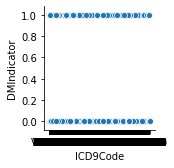

In [385]:
sns.pairplot(test, x_vars=['ICD9Code'], y_vars=['DMIndicator']) # no clear correlation, going to crosstab to dive in deeper

In [386]:
ICD = pd.crosstab(test['ICD9Code'], test['DMIndicator'], margins=True)
codes = ICD.index
ICD['Codes'] = codes
ICD.columns = ['Zero','One','All','Codes']
ICD['Percent'] = ICD.One/ICD.All
ICD.sort_values(by = 'Percent',ascending = False, inplace = True)
ICD = ICD[ICD['All']>20].copy()
ICD = ICD[ICD['Percent']>.49].copy()

Taking a look at this, we can see which ICD codes have a highest percentage of ones.  There are larger ICD9 groupings or buckets that we could use (https://en.wikipedia.org/wiki/List_of_ICD-9_codes) but instead we will be grouping on the analysis below:

In [387]:
ICD.head(14) 

,Zero,One,All,Codes,Percent
ICD9Code,,,,,
250.61,0,32,32,250.61,1.000000
276.7,14,22,36,276.7,0.611111
414.00,38,53,91,414.00,0.582418
585.3,45,58,103,585.3,0.563107
791.0,19,24,43,791.0,0.558140
585.9,23,29,52,585.9,0.557692
285.2,13,16,29,285.2,0.551724
585.2,12,13,25,585.2,0.520000
V03.82,24,26,50,V03.82,0.520000


Now, taking a look at medication to see if there are medications which have a higher percentage of ones

In [388]:
SyncMedication_Test = training_SyncMedication.merge(training_SyncPatient[{'PatientGuid', 'DMIndicator'}], how = 'left', on = 'PatientGuid')

In [389]:
SyncMedication_Test.shape #again, we can see that there are "duplicate" rows meaning there are patients with multiple medications
#this will likely be true for all other datasets and so the main task will be feature engineering and flattening

(44520, 9)

In [390]:
Medication = pd.crosstab(SyncMedication_Test['MedicationGuid'], SyncMedication_Test['DMIndicator'], margins=True)
Medication.reset_index(level=0, inplace=True)
Medication.columns = ['MedicationGuid','Zero','One','All']
Medication['Percent'] = Medication.One/Medication.All
Medication.sort_values(by = 'Percent',ascending = False, inplace = True)

In [391]:
Medication.head()

,MedicationGuid,Zero,One,All,Percent
14771,80192B7F-F17E-47BF-B0FC-56644A9C2B0A,0,1,1,1.0
14411,7CE19242-FB4C-44C1-B996-952A281747F7,0,1,1,1.0
4665,2844642A-4788-4CD6-8162-34ECBB248E5E,0,1,1,1.0
14386,7C96C525-1A89-4401-8229-8CFE11C88A01,0,1,1,1.0
14391,7CA7A675-715D-4B7F-9B53-26F3B96203C1,0,1,1,1.0


In [392]:
Medication = Medication[Medication['All']>20].copy()
Medication = Medication[Medication['Percent']>.49].copy()

Since we have a large number of medications and an equitable spread amongst all of them - we will need to figure out another way to group them. The obvious two method would be to speak with people in the industry or through research. Due to time constraints, will be looking at count of medication as an indicator. 

In [393]:
Medication.head(50) 

,MedicationGuid,Zero,One,All,Percent


Now, taking a look at the smoking files. 

In [394]:
for c in training_SyncPatientSmokingStatus.columns:
    print('----%s----' % c)
    print(training_SyncPatientSmokingStatus[c].value_counts())

----PatientSmokingStatusGuid----
78A93496-8357-4A9C-BDFC-5A6F82647625    1
248A604A-8DAD-4855-9C89-079A13BDECC9    1
C8DDE7EF-A59E-4427-B5D1-3CB93D776627    1
10059E81-97D8-4131-88A7-801E9EE357CD    1
92C3F2E9-5275-431E-875C-040E8BD8DA70    1
44BDD8A4-5C4A-4A16-9700-638A91564927    1
8D7F33F5-411D-4AA9-B6CB-27A6BCE2AF44    1
FFDD2051-855C-479F-8148-9408EF361B64    1
476A09FC-A422-4348-A506-B3F892A06981    1
B1408E4C-6BB1-4EBA-8F7C-9910162FAD82    1
140849E4-CA8A-4C04-A965-76A594B8846B    1
309877B0-98BB-402F-A917-44720658418F    1
4625158C-9787-402B-B239-3C123FF3EDC3    1
76B0486A-6BB4-464B-9C43-9F5AB404015C    1
87A05134-E0EA-4CDF-8FC0-53F435966D77    1
4F911625-E96A-4DD9-9B14-7D80668334AD    1
63F6EC94-3DA7-4D4A-A412-B5FB9E96879C    1
BF17D3B1-591F-48A7-86C7-558432F1A786    1
357553FC-9D3E-40E1-A07E-ECDC91C908F5    1
6634D6CF-6C27-4D4A-8917-B7EF11F43AA5    1
E4B54203-F087-4961-AF73-D7C24ABC243B    1
0A67156C-B7B5-4B4E-B4F9-874344988F72    1
7A463A1A-8916-4017-8503-0B0F80347586    1
8

In [395]:
training_SyncPatientSmokingStatus.shape

(4940, 4)

In [396]:
training_SyncPatientSmokingStatus['PatientGuid'].nunique() 

4427

Looks like we have some duplicates but not too many, going to drop and take the most recent year. This is under the assumption that the recent entry will have more relevant information. 

In [397]:
training_SyncPatientSmokingStatus['EffectiveYear'].value_counts()

2011    3345
2012    1447
2010      35
2009      16
2000       8
2005       8
2004       6
1970       6
1980       5
1975       4
2007       3
2003       3
2008       3
1981       3
1997       3
1991       3
2001       3
0          3
1998       3
2002       3
1979       3
1985       2
1956       2
1967       2
1996       2
1990       2
1965       2
1971       2
1989       1
2006       1
1937       1
1995       1
1943       1
1999       1
1955       1
1987       1
1934       1
1964       1
1978       1
1928       1
1994       1
Name: EffectiveYear, dtype: int64

In [398]:
Smoking_Merged = training_SyncPatientSmokingStatus.merge(SyncSmokingStatus, how = 'left', on = 'SmokingStatusGuid')

In [399]:
Smoking_Merged.shape

(4940, 6)

In [400]:
Smoking_Merged.sort_values(by = 'EffectiveYear', ascending = True, inplace = True) 

The below shows that we only have a few 0s within the effective year column, none of which are duplicated.  This is good news as we can drop duplicates and keep the last entry (read: most recent) once sorted. If there were a significant number of 0s within the effective year column, we would need to go with another method for flattening the file. 

In [401]:
Smoking_Merged.head(5)

,PatientSmokingStatusGuid,PatientGuid,SmokingStatusGuid,EffectiveYear,Description,NISTcode
4771,5B6BE503-1EF8-4D77-8E8C-F701AF04E490,E4BBCBFE-5E18-4AC8-AB13-A82C899C45BA,FCD437AA-0451-4D8A-9396-B6F19D8B25E8,0,1-2 packs per day,1
904,0DB3517B-44EE-4BCB-AA5F-2E5EB9B49007,42AEFCAF-588F-4BA9-AD98-C21358B910E3,C12C2DB7-D31A-4514-88C0-42CBD339F764,0,0 cigarettes per day (previous smoker),3
699,1B7B3544-D2C8-4C79-9D70-23C1BFF97A09,631CD3C2-6E12-4FE1-9EB3-19086FB3FD21,5ABBAB35-836F-4F3E-8632-CE063828DA15,0,0 cigarettes per day (non-smoker or less than ...,4
4212,509495D1-FA83-4BBB-88EA-D9E56B3B06A2,1E7E90F6-0EDE-4B44-A0FB-0B9FA4CD200E,5ABBAB35-836F-4F3E-8632-CE063828DA15,1928,0 cigarettes per day (non-smoker or less than ...,4
4244,7879065D-AC40-4C33-A973-DC0DA903508C,862F8731-20B4-4653-8B70-9FE745DF1DE7,5ABBAB35-836F-4F3E-8632-CE063828DA15,1934,0 cigarettes per day (non-smoker or less than ...,4


In [402]:
SyncSmokingStatus.head(15)

,SmokingStatusGuid,Description,NISTcode
0,E86CA3A8-E35B-4BBF-80E2-0375AB4A1460,Current status unknown,9
1,1F3BFBBF-AB76-481B-B1E0-08A3689A54BC,Not a current tobacco user,0
2,C12C2DB7-D31A-4514-88C0-42CBD339F764,0 cigarettes per day (previous smoker),3
3,FA2B7AE4-4D14-4768-A8C7-55B5F0CDF4AF,Few (1-3) cigarettes per day,2
4,0815F240-3DD3-43C6-8618-613CA9E41F9F,Current status unknown,5
5,02116D5A-F26C-4A48-9A11-75AC21BC4FD3,2 or more packs per day,1
6,DD01E545-D7AF-4F00-B248-9FD40010D81D,Up to 1 pack per day,1
7,FCD437AA-0451-4D8A-9396-B6F19D8B25E8,1-2 packs per day,1
8,5ABBAB35-836F-4F3E-8632-CE063828DA15,0 cigarettes per day (non-smoker or less than ...,4
9,2548BD83-03AE-4287-A578-FA170F39E32F,Current Tobacco user,0


In [403]:
Smoking_EDA = Smoking_Merged.merge(training_SyncPatient[{'PatientGuid','DMIndicator'}], how = 'left', on = 'PatientGuid')

In [404]:
Smoking = pd.crosstab(Smoking_EDA['Description'], Smoking_EDA['DMIndicator'], margins=True)
Smoking.reset_index(level=0, inplace=True)
Smoking.columns = ['Description','Zero','One','All']
Smoking['Percent'] = Smoking.One/Smoking.All
Smoking.sort_values(by = 'Percent',ascending = False, inplace = True)

from the results below, it looks like there are higher instances of ones within certain groups. The previous groupings are pretty good but could be slightly "improved". Essentially, we are merging together the unknowns together, for whatever reason those aren't grouped together. We can also see that not a current tobacco stands out. It's unclear if people misinterpreted this to mean previous smoker (which may explain the higher instances of 1s within this group) as we would expect current tobacco user to display a higher percentage. 

In [405]:
Smoking.head(30)

,Description,Zero,One,All,Percent
1,0 cigarettes per day (previous smoker),375,135,510,0.264706
7,Not a current tobacco user,613,195,808,0.241337
3,2 or more packs per day,7,2,9,0.222222
9,All,2581,665,3246,0.204868
2,1-2 packs per day,54,13,67,0.194030
8,Up to 1 pack per day,234,51,285,0.178947
0,0 cigarettes per day (non-smoker or less than ...,1138,245,1383,0.177151
6,Few (1-3) cigarettes per day,92,16,108,0.148148
4,Current Tobacco user,48,7,55,0.127273
5,Current status unknown,20,1,21,0.047619


In [406]:
new_codes = [0]*Smoking_EDA.shape[0]
for i in range(Smoking_EDA.shape[0]):
    if Smoking_EDA['Description'].iloc[i] == '2 or more packs per day' or Smoking_EDA['Description'].iloc[i] == 'Up to 1 pack per day' or Smoking_EDA['Description'].iloc[i] == '1-2 packs per day':
        new_codes[i] = 2
    elif Smoking_EDA['Description'].iloc[i] == 'Current status unknown':
        new_codes[i] = 5
    elif Smoking_EDA['Description'].iloc[i] == 'Not a current tobacco user' or Smoking_EDA['Description'].iloc[i] == '0 cigarettes per day (previous smoker)':
        new_codes[i] = 0
    elif Smoking_EDA['Description'].iloc[i] == 'Few (1-3) cigarettes per day':
        new_codes[i] = 1
    elif Smoking_EDA['Description'].iloc[i] == '0 cigarettes per day (non-smoker or less than 100 in lifetime)':
        new_codes[i] = 3
    else:
        new_codes[i] = 4

In [407]:
Smoking_EDA['new_codes'] = new_codes

In [408]:
Smoking = pd.crosstab(Smoking_EDA['new_codes'], Smoking_EDA['DMIndicator'], margins=True)
Smoking.reset_index(level=0, inplace=True)
Smoking.columns = ['newcodes','Zero','One','All']
Smoking['Percent'] = Smoking.One/Smoking.All
Smoking.sort_values(by = 'Percent',ascending = False, inplace = True)

In [409]:
Smoking.head(30)

,newcodes,Zero,One,All,Percent
0,0,988,330,1318,0.250379
6,All,2581,665,3246,0.204868
2,2,295,66,361,0.182825
3,3,1138,245,1383,0.177151
1,1,92,16,108,0.148148
4,4,48,7,55,0.127273
5,5,20,1,21,0.047619


Now Taking a look at SyncTranscript

In [410]:
for c in training_SyncTranscript.columns:
    print('----%s----' % c)
    print(training_SyncTranscript[c].value_counts())

----TranscriptGuid----
FD41D182-85A0-4377-A908-7481202A36D9    1
610E59BC-6AA6-4DF3-A0D8-6E211DA43650    1
4A05AC96-F2D3-420E-B5F7-493C53BDC88A    1
F141ACBD-B977-4670-AE4A-58980706DE8F    1
442113F9-AEA7-42BB-8E54-585243BB244D    1
9F01CAF2-999B-4C91-BEF6-28CF98E2CC6C    1
5B47A94B-FD92-4EBF-AE06-69401CACF18D    1
E8C3BAF1-A89A-447F-BDFF-FC1E8E8B8C5D    1
15BEE28C-8BF2-4ABC-8659-11B7DB7E12DA    1
4405940F-3008-4A9F-BF5F-EEC449B038E2    1
BD979CA7-2F97-4AB8-AFB6-E42EFFF64D47    1
DAD3DA28-12BD-460D-B4AA-D9C0E8B853A8    1
E72C812A-0719-481F-9860-ED686E63C458    1
0AFAE81D-3AC5-4C93-845B-09097674D515    1
890FA9C5-DA9B-4FDE-8F77-AE28C2BA2158    1
0ECE13ED-0C93-4021-B6FE-C668AE69A848    1
31B887E3-8083-4BD2-BAC8-FCC292ECB0D7    1
75EFA7BE-999B-4339-9478-E08922A0B1D7    1
FD2C28DA-D419-4CAC-A5C3-957A5134E8D2    1
280E68B4-5171-47CC-A634-D27E33C4B603    1
C58A1BDA-0665-46FC-B96F-DEAD830DFF99    1
B87CFD50-2C4F-411D-8381-34F8AC48BDCF    1
E81A848F-C081-49F9-804C-791B140A9F6C    1
1E58B719-80

In [411]:
training_SyncTranscript.columns

Index(['TranscriptGuid', 'PatientGuid', 'VisitYear', 'Height', 'Weight', 'BMI',
       'SystolicBP', 'DiastolicBP', 'RespiratoryRate', 'HeartRate',
       'Temperature', 'PhysicianSpecialty', 'UserGuid'],
      dtype='object')

In [412]:
training_SyncTranscript.shape

(131031, 13)

we have a fair bit of nulls here. since we have all of the BMIs and weights, might be able to reverse engineer height

In [413]:
training_SyncTranscript.isnull().sum() 

TranscriptGuid             0
PatientGuid                0
VisitYear                  0
Height                 70983
Weight                     0
BMI                        0
SystolicBP             45451
DiastolicBP            45451
RespiratoryRate        79839
HeartRate             131031
Temperature            80997
PhysicianSpecialty       181
UserGuid                   0
dtype: int64

lots of zeroes for weight unfortunately

In [414]:
training_SyncTranscript['Weight'].value_counts()

0.000      56965
180.000      770
170.000      744
150.000      716
200.000      707
190.000      699
160.000      638
185.000      627
165.000      609
175.000      574
172.000      570
178.000      568
140.000      557
182.000      557
168.000      547
176.000      544
130.000      535
220.000      534
155.000      533
195.000      533
210.000      532
158.000      532
145.000      519
164.000      516
192.000      510
194.000      509
186.000      508
135.000      498
152.000      492
188.000      491
           ...  
96.100         1
319.500        1
99.100         1
207.235        1
261.400        1
199.100        1
205.912        1
380.000        1
101.300        1
478.403        1
212.526        1
120.700        1
279.987        1
416.674        1
237.100        1
269.300        1
292.994        1
165.100        1
301.600        1
244.900        1
244.100        1
148.592        1
307.100        1
155.900        1
213.011        1
11.500         1
194.250        1
20.800        

In [415]:
training_SyncTranscript['BMI'].value_counts()

0.000     71636
29.950      124
22.312       98
28.694       94
27.122       92
28.886       88
24.208       87
22.860       84
24.959       83
29.225       76
25.683       75
26.431       74
29.190       72
27.454       72
27.366       71
25.840       70
28.189       70
28.120       69
24.372       68
30.894       68
24.127       67
26.936       66
21.946       64
29.646       63
27.062       62
22.495       62
28.286       60
29.285       59
34.716       59
22.140       58
          ...  
18.056        1
42.039        1
29.073        1
28.921        1
36.533        1
15.985        1
31.797        1
17.138        1
38.029        1
39.041        1
24.295        1
35.178        1
31.916        1
39.895        1
21.762        1
29.863        1
39.403        1
20.902        1
22.473        1
22.402        1
24.355        1
17.430        1
25.829        1
20.728        1
38.626        1
23.199        1
17.010        1
34.067        1
33.698        1
41.132        1
Name: BMI, Length: 11736

Since we have a lot of nulls or zeroes in a couple of categories. I'm wondering if our NaNs in height correspond to the zeroes in BMI and weight. Edit: looks like i'm correct - if the values are missing for one they're likely missing for the others. 

In [416]:
test = training_SyncTranscript[training_SyncTranscript['Height'].notnull()]

In [417]:
test.shape

(60048, 13)

In [418]:
training_SyncTranscript['VisitYear'].value_counts()

2010    48132
2011    43360
2009    19945
2012    15640
0        3954
Name: VisitYear, dtype: int64

Going to deduplicate based on year with the logic being that the most recent weight, BMI, etc likely has the largest impact on whether or not that person has diabetes. Of course, there are other methodologies one could take here. 

In [419]:
training_SyncTranscript.head()

,TranscriptGuid,PatientGuid,VisitYear,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate,HeartRate,Temperature,PhysicianSpecialty,UserGuid
0,4E74D809-F0C6-4A4D-8F6F-0000042B3AEA,7F78C9FD-8A95-48DC-B074-FA41F5B41826,2009,63.0,145.8,25.824,NaN,NaN,NaN,NaN,NaN,Family Practice,226D906B-E53A-4EEA-86A8-633D14B98BF2
1,84A5F60E-49F6-4437-BAE1-00004F4D15EE,EE1E2D06-8846-4BF5-9C82-E08BC8798DAE,2011,NaN,0.0,0.000,NaN,NaN,NaN,NaN,NaN,Family Practice,412307EE-D407-4F16-8379-D4A88A7B1122
2,7C45CC93-4799-42A1-B6D6-00008D1B3579,1FF23603-B9D4-42B0-B450-BCD5EA46A025,2010,64.5,133.0,22.474,106.0,66.0,NaN,NaN,98.2,Family Practice,B366A9CC-814C-4B2F-99E5-4DC5C79B9DEC
3,375F3C1C-0058-4872-B96E-00009FE9328A,16C2D99F-1494-4DF9-82E6-0FA0F0EB1B63,2011,68.0,125.4,19.065,119.0,64.0,NaN,NaN,98.2,Family Practice,B8CDE35A-5C03-4995-B771-10F660B84F1A
4,66439EEB-2FFB-4711-87F2-0001690835A6,18256C20-BAC8-4F57-A03C-2C7152CE1813,2011,NaN,0.0,0.000,NaN,NaN,NaN,NaN,NaN,Family Practice,6D105E1E-EACC-478E-9454-FBED1F50F888


In [420]:
training_SyncTranscript.sort_values(by = 'VisitYear', ascending = True, inplace = True)

In [421]:
training_SyncTranscript.iloc[(training_SyncTranscript.shape[0]-5):training_SyncTranscript.shape[0],2]

76163     2012
10390     2012
111305    2012
30230     2012
56379     2012
Name: VisitYear, dtype: int64

In [422]:
Transcript = training_SyncTranscript.merge(train_test_SyncPatient[{'PatientGuid','Gender','YearOfBirth','DMIndicator'}], how = 'left', on = 'PatientGuid')

In [423]:
Transcript = Transcript[Transcript['DMIndicator'].notnull()]

In [424]:
Transcript.columns

Index(['TranscriptGuid', 'PatientGuid', 'VisitYear', 'Height', 'Weight', 'BMI',
       'SystolicBP', 'DiastolicBP', 'RespiratoryRate', 'HeartRate',
       'Temperature', 'PhysicianSpecialty', 'UserGuid', 'YearOfBirth',
       'DMIndicator', 'Gender'],
      dtype='object')

In [425]:
Transcript['Age'] = 2019 - Transcript['YearOfBirth']

In [426]:
Transcript[{'Age','YearOfBirth'}].head(10)

,Age,YearOfBirth
0,30,1989
1,79,1940
4,64,1955
5,57,1962
6,48,1971
7,80,1939
8,31,1988
10,51,1968
11,31,1988
12,67,1952


In [427]:
Transcript_EDA = pd.crosstab(Transcript['Age'], Transcript['DMIndicator'], margins=True)
Transcript_EDA.reset_index(level=0, inplace=True)
Transcript_EDA.columns = ['Age','Zero','One','All']
Transcript_EDA['Percent'] = Transcript_EDA.One/Transcript_EDA.All
#Transcript_EDA.sort_values(by = 'Percent',ascending = False, inplace = True)

We can see that around age 55, we have a jump in the percentage of 1s. 

In [428]:
Transcript_EDA.head(50) #we can see a jump in the percentage at around age

,Age,Zero,One,All,Percent
0,25,181,0,181,0.000000
1,26,672,0,672,0.000000
2,27,454,0,454,0.000000
3,28,463,0,463,0.000000
4,29,641,28,669,0.041854
5,30,469,10,479,0.020877
6,31,505,0,505,0.000000
7,32,830,25,855,0.029240
8,33,592,19,611,0.031097
9,34,593,0,593,0.000000


In [429]:
training_SyncTranscript.columns

Index(['TranscriptGuid', 'PatientGuid', 'VisitYear', 'Height', 'Weight', 'BMI',
       'SystolicBP', 'DiastolicBP', 'RespiratoryRate', 'HeartRate',
       'Temperature', 'PhysicianSpecialty', 'UserGuid'],
      dtype='object')

In [430]:
Transcript_EDA = pd.crosstab(Transcript['PhysicianSpecialty'], Transcript['DMIndicator'], margins=True)
Transcript_EDA.reset_index(level=0, inplace=True)
Transcript_EDA.columns = ['PhysicianSpecialty','Zero','One','All']
Transcript_EDA['Percent'] = Transcript_EDA.One/Transcript_EDA.All
Transcript_EDA.sort_values(by = 'Percent',ascending = False, inplace = True)
#Transcript_EDA = Transcript_EDA[Transcript_EDA['All']>20].copy()
#Transcript_EDA = Transcript_EDA[Transcript_EDA['Percent']>.49].copy()

Creating a list physician specialties that are most associated with diabetes. Again given time constraints, we are utilizing this methodology as opposed to research or speaking with people in the industry. Choosing a cutoff of of 40% as well as selecting those with a high count.

In [431]:
Transcript_EDA.head(20)

,PhysicianSpecialty,Zero,One,All,Percent
11,Critical Care Medicine,1,3,4,0.750000
44,Physical Medicine & Rehabilitation,57,77,134,0.574627
28,Nephrology,186,215,401,0.536160
40,Otolaryngology,1,1,2,0.500000
16,Endocrinology; Diabetes; & Metabolism,314,301,615,0.489431
2,Adolescent Medicine,25,23,48,0.479167
51,Pulmonary Disease,49,45,94,0.478723
52,Rheumatology,113,96,209,0.459330
46,Podiatry,419,238,657,0.362253
34,Nutrition,9,5,14,0.357143


In [432]:
comorbidity = ['Physical Medicine & Rehabilitation','Nephrology','Pulmonary Disease','Endocrinology; Diabetes; & Metabolism','Rheumatology']

# Flattening Files

The following sections are where I flatten each of the files individually and then merge them together. You can start here if you are lacking RAM/working memory. 

# Flattening Sync Diagnosis

Some of the ICD9 codes have strings that need to be replaced. 

In [433]:
training_SyncDiagnosis['ICD9Code'] = training_SyncDiagnosis['ICD9Code'].str.replace("V",'2000')
training_SyncDiagnosis['ICD9Code'] = training_SyncDiagnosis['ICD9Code'].str.replace("E",'2000')
training_SyncDiagnosis['ICD9Code'] = training_SyncDiagnosis['ICD9Code'].str.replace("v",'2000')
training_SyncDiagnosis['ICD9Code'] = training_SyncDiagnosis['ICD9Code'].str.replace("e",'2000')

In [434]:
training_SyncDiagnosis['ICD9Code'] = training_SyncDiagnosis['ICD9Code'].astype(float)

In [435]:
diagnosis_list = [0]*training_SyncDiagnosis.shape[0]
for i in range(training_SyncDiagnosis.shape[0]):
    if training_SyncDiagnosis['ICD9Code'].iloc[i] == 585.00 or training_SyncDiagnosis['ICD9Code'].iloc[i] == 276.70 or training_SyncDiagnosis['ICD9Code'].iloc[i] == 250.61:
        diagnosis_list[i] = 1
    else:
        diagnosis_list[i] = 0

In [436]:
training_SyncDiagnosis['ICD_Bucket'] = diagnosis_list

In [437]:
Final_SyncDiagnosis = training_SyncDiagnosis.pivot_table(['ICD_Bucket'],
               index = ['PatientGuid'], aggfunc='sum')

In [438]:
Final_SyncDiagnosis.reset_index(level=0, inplace=True)

The following is the end result. The buckets currently indicate how many diagnosis the patient had for the ICD 9 codes listed above. Buckets 2 and 3 are rather small so we could roll these back up into bucket 1 making it a binary indicator

In [439]:
Final_SyncDiagnosis['ICD_Bucket'].value_counts()

0    9806
1     127
2      13
3       2
Name: ICD_Bucket, dtype: int64

In [440]:
dict = {
    0:0,
 1:1,
 2:1,
 3:1
}
Final_SyncDiagnosis['ICD_Bucket'] = Final_SyncDiagnosis['ICD_Bucket'].map(dict)
Final_SyncDiagnosis['ICD_Bucket'].value_counts()

0    9806
1     142
Name: ICD_Bucket, dtype: int64

# Flattening Sync Medication

Next, merging with SyncMedication. Going to merge on DiagnosisGuid (assuming each medicine is related to a specific diagnosis). Going to not include PatientGuid (irrelevant). Was going to rename StartYear and StopYear but it appears theyve been taken out. 

In [441]:
training_SyncMedication.columns

Index(['MedicationGuid', 'PatientGuid', 'NdcCode', 'MedicationName',
       'MedicationStrength', 'Schedule', 'DiagnosisGuid', 'UserGuid'],
      dtype='object')

In [442]:
training_SyncMedication['Count'] = 1

In [443]:
training_SyncMedication = pd.crosstab(training_SyncMedication['PatientGuid'], training_SyncMedication['Count'])

In [444]:
training_SyncMedication.reset_index(level=0, inplace=True)

In [445]:
training_SyncMedication.columns = ['PatientGuid', 'Count_of_Medications']

In [446]:
training_SyncMedication.head()

,PatientGuid,Count_of_Medications
0,00023761-9D8D-445B-874C-2424CC7CF620,1
1,0005D9BD-0247-4F02-B7EE-7C1B44825FA1,1
2,000B4862-7CE7-4EC5-8043-A97FCD74BD78,2
3,00110ABC-DAB9-49E3-A1C8-88BBF8D58109,4
4,002667F4-B9A3-4DE2-875F-8034DD637865,1


# Flattening Sync Patient Smoking Status

In [447]:
Smoking_Merged = training_SyncPatientSmokingStatus.merge(SyncSmokingStatus, how = 'left', on = 'SmokingStatusGuid')

In [448]:
Smoking_Merged.shape

(4940, 6)

In [449]:
Smoking_Merged.sort_values(by = 'EffectiveYear', ascending = True, inplace = True) #shows that we only have
# a few 0s, not of which are duplicated. 

In [450]:
Smoking_Merged.head(5)

,PatientSmokingStatusGuid,PatientGuid,SmokingStatusGuid,EffectiveYear,Description,NISTcode
4771,5B6BE503-1EF8-4D77-8E8C-F701AF04E490,E4BBCBFE-5E18-4AC8-AB13-A82C899C45BA,FCD437AA-0451-4D8A-9396-B6F19D8B25E8,0,1-2 packs per day,1
904,0DB3517B-44EE-4BCB-AA5F-2E5EB9B49007,42AEFCAF-588F-4BA9-AD98-C21358B910E3,C12C2DB7-D31A-4514-88C0-42CBD339F764,0,0 cigarettes per day (previous smoker),3
699,1B7B3544-D2C8-4C79-9D70-23C1BFF97A09,631CD3C2-6E12-4FE1-9EB3-19086FB3FD21,5ABBAB35-836F-4F3E-8632-CE063828DA15,0,0 cigarettes per day (non-smoker or less than ...,4
4212,509495D1-FA83-4BBB-88EA-D9E56B3B06A2,1E7E90F6-0EDE-4B44-A0FB-0B9FA4CD200E,5ABBAB35-836F-4F3E-8632-CE063828DA15,1928,0 cigarettes per day (non-smoker or less than ...,4
4244,7879065D-AC40-4C33-A973-DC0DA903508C,862F8731-20B4-4653-8B70-9FE745DF1DE7,5ABBAB35-836F-4F3E-8632-CE063828DA15,1934,0 cigarettes per day (non-smoker or less than ...,4


In [451]:
new_codes = [0]*Smoking_Merged.shape[0]
for i in range(Smoking_Merged.shape[0]):
    if Smoking_Merged['Description'].iloc[i] == '2 or more packs per day' or Smoking_Merged['Description'].iloc[i] == 'Up to 1 pack per day' or Smoking_Merged['Description'].iloc[i] == '1-2 packs per day':
        new_codes[i] = 2
    elif Smoking_Merged['Description'].iloc[i] == 'Current status unknown':
        new_codes[i] = 5
    elif Smoking_Merged['Description'].iloc[i] == 'Not a current tobacco user' or Smoking_Merged['Description'].iloc[i] == '0 cigarettes per day (previous smoker)':
        new_codes[i] = 0
    elif Smoking_Merged['Description'].iloc[i] == 'Few (1-3) cigarettes per day':
        new_codes[i] = 1
    elif Smoking_Merged['Description'].iloc[i] == '0 cigarettes per day (non-smoker or less than 100 in lifetime)':
        new_codes[i] = 3
    else:
        new_codes[i] = 4
Smoking_Merged['new_codes'] = new_codes

In [452]:
Smoking_Merged.drop_duplicates(subset = 'PatientGuid', keep = 'last', inplace = True)

In [453]:
Smoking_Merged[Smoking_Merged['new_codes']==3]['EffectiveYear'].value_counts()

2011    1232
2012     644
2010       7
2009       4
2005       1
1998       1
1981       1
1979       1
1970       1
1956       1
1937       1
1934       1
1928       1
0          1
Name: EffectiveYear, dtype: int64

# Flattening Sync Transcript

In [454]:
training_SyncTranscript.isnull().sum()/training_SyncTranscript.shape[0] 

TranscriptGuid        0.000000
PatientGuid           0.000000
VisitYear             0.000000
Height                0.541727
Weight                0.000000
BMI                   0.000000
SystolicBP            0.346872
DiastolicBP           0.346872
RespiratoryRate       0.609314
HeartRate             1.000000
Temperature           0.618151
PhysicianSpecialty    0.001381
UserGuid              0.000000
dtype: float64

In [455]:
training_SyncTranscript.sort_values(by = 'VisitYear', ascending = True, inplace = True)

In [456]:
training_SyncTranscript.drop_duplicates(subset = 'PatientGuid', keep = 'last', inplace = True)

In [457]:
training_SyncTranscript.shape

(9948, 13)

It was possible that deleting duplicates in this case would result in the loss of information, aka more nulls, quick check is showing a decrease in nulls. 

In [458]:
training_SyncTranscript.isnull().sum()/training_SyncTranscript.shape[0] 

TranscriptGuid        0.000000
PatientGuid           0.000000
VisitYear             0.000000
Height                0.391134
Weight                0.000000
BMI                   0.000000
SystolicBP            0.238339
DiastolicBP           0.238339
RespiratoryRate       0.541516
HeartRate             1.000000
Temperature           0.535887
PhysicianSpecialty    0.001407
UserGuid              0.000000
dtype: float64

In [459]:
training_SyncTranscript.columns

Index(['TranscriptGuid', 'PatientGuid', 'VisitYear', 'Height', 'Weight', 'BMI',
       'SystolicBP', 'DiastolicBP', 'RespiratoryRate', 'HeartRate',
       'Temperature', 'PhysicianSpecialty', 'UserGuid'],
      dtype='object')

In [460]:
comorbidity

['Physical Medicine & Rehabilitation',
 'Nephrology',
 'Pulmonary Disease',
 'Endocrinology; Diabetes; & Metabolism',
 'Rheumatology']

In [461]:
comorbidity_list = [0]*training_SyncTranscript.shape[0]
for i in range(training_SyncTranscript.shape[0]):
    if training_SyncTranscript['PhysicianSpecialty'].iloc[i] == 'Physical Medicine & Rehabilitation' or training_SyncTranscript['PhysicianSpecialty'].iloc[i] == 'Nephrology' or training_SyncTranscript['PhysicianSpecialty'].iloc[i] == 'Pulmonary Disease' or training_SyncTranscript['PhysicianSpecialty'].iloc[i] == 'Endocrinology; Diabetes; & Metabolism' or training_SyncTranscript['PhysicianSpecialty'].iloc[i] == 'Rheumatology' :
        comorbidity_list[i] = 1
    else:
        comorbidity_list[i] = 0

In [462]:
training_SyncTranscript['Comorbidity'] = comorbidity_list

Now, going to impute values. There doesn't seem to be a very good method due to the high volume of missing values. Going to merge in age/gender and impute values with the average for said population. 

In [463]:
Transcript = training_SyncTranscript.merge(test_SyncPatient[{'PatientGuid','Gender','YearOfBirth'}], how = 'left', on = 'PatientGuid')

In [464]:
Transcript['Age'] = 2019 - Transcript['YearOfBirth']

In [465]:
Transcript[{'Age','YearOfBirth'}].head(10)

,Age,YearOfBirth
0,37,1982
1,46,1973
2,92,1927
3,58,1961
4,60,1959
5,84,1935
6,36,1983
7,66,1953
8,67,1952
9,31,1988


Taking a look at age to determine the min and max age. Next will be creating buckets and then dictionaries that contain the average BMI, weight, etc for every gender/age combination. This dictionary will then be used in a for loop to fill in any values that are either NaN or 0. 

In [466]:
Transcript['Age'].min()

25

In [467]:
Transcript['Age'].max()

97

In [468]:
bins = [0,30,35,39,45,49,55,59,65,69,75,79,85,89, np.inf]
names = ['<30', '30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90+']
Transcript['Age_Range'] = pd.cut(Transcript['Age'], bins, labels=names)

In [469]:
Transcript_Male = Transcript[Transcript['Gender']=='M']
Transcript_Female = Transcript[Transcript['Gender']=='F']

In [470]:
BMI_Male = Transcript_Male[Transcript_Male['BMI'].notnull()].pivot_table(['BMI'],index = ['Age_Range'], aggfunc='mean')
BMI_Male_dict = BMI_Male.T.to_dict('records')

BMI_Female = Transcript_Female[Transcript_Female['BMI'].notnull()].pivot_table(['BMI'],index = ['Age_Range'], aggfunc='mean')
BMI_Female_dict = BMI_Male.T.to_dict('records')

Weight_Male = Transcript_Male[Transcript_Male['Weight'].notnull()].pivot_table(['Weight'],index = ['Age_Range'], aggfunc='mean')
Weight_Male_dict = BMI_Male.T.to_dict('records')

Weight_Female = Transcript_Female[Transcript_Female['Weight'].notnull()].pivot_table(['Weight'],index = ['Age_Range'], aggfunc='mean')
Weight_Female_dict = BMI_Male.T.to_dict('records')

SystolicBP_Male = Transcript_Male[Transcript_Male['SystolicBP'].notnull()].pivot_table(['SystolicBP'],index = ['Age_Range'], aggfunc='mean')
SystolicBP_Male_dict = BMI_Male.T.to_dict('records')

DiastolicBP_Male = Transcript_Male[Transcript_Male['DiastolicBP'].notnull()].pivot_table(['DiastolicBP'],index = ['Age_Range'], aggfunc='mean')
DiastolicBP_Male_dict = BMI_Male.T.to_dict('records')

SystolicBP_Female = Transcript_Female[Transcript_Female['SystolicBP'].notnull()].pivot_table(['SystolicBP'],index = ['Age_Range'], aggfunc='mean')
SystolicBP_Female_dict = BMI_Male.T.to_dict('records')

DiastolicBP_Female = Transcript_Female[Transcript_Female['DiastolicBP'].notnull()].pivot_table(['DiastolicBP'],index = ['Age_Range'], aggfunc='mean')
DiastolicBP_Female_dict = BMI_Male.T.to_dict('records')

In [471]:
new_bmi = [0]*Transcript.shape[0]
new_weight = [0]*Transcript.shape[0]
new_Diastolic = [0]*Transcript.shape[0]
new_Systolic = [0]*Transcript.shape[0]

In [472]:
for i in range(Transcript.shape[0]):
    if (pd.isnull(Transcript['Weight'].iloc[i])) or (Transcript['Weight'].iloc[i] == 0):
        if Transcript['Gender'].iloc[i] == 'M':
            new_weight[i] = Weight_Male_dict[0].get(Transcript['Age_Range'].iloc[i])
        else:
            new_weight[i] = Weight_Female_dict[0].get(Transcript['Age_Range'].iloc[i])
    else:
        new_weight[i] = Transcript['Weight'].iloc[i]

In [473]:
for i in range(Transcript.shape[0]):
    if pd.isnull(Transcript['BMI'].iloc[i]) or Transcript['BMI'].iloc[i] == 0:
        if Transcript['Gender'].iloc[i] == 'M':
            new_bmi[i] = BMI_Male_dict[0].get(Transcript['Age_Range'].iloc[i])
        else:
            new_bmi[i] = BMI_Female_dict[0].get(Transcript['Age_Range'].iloc[i])
    else:
        new_bmi[i] = Transcript['BMI'].iloc[i]

In [474]:
for i in range(Transcript.shape[0]):
    if pd.isnull(Transcript['DiastolicBP'].iloc[i]) or Transcript['DiastolicBP'].iloc[i] == 0:
        if Transcript['Gender'].iloc[i] == 'M':
            new_Diastolic[i] = DiastolicBP_Male_dict[0].get(Transcript['Age_Range'].iloc[i])
        else:
            new_Diastolic[i] = DiastolicBP_Female_dict[0].get(Transcript['Age_Range'].iloc[i])
    else:
        new_Diastolic[i] = Transcript['DiastolicBP'].iloc[i]

In [475]:
for i in range(Transcript.shape[0]):
    if pd.isnull(Transcript['SystolicBP'].iloc[i]) or Transcript['SystolicBP'].iloc[i] == 0:
        if Transcript['Gender'].iloc[i] == 'M':
            new_Systolic[i] = SystolicBP_Male_dict[0].get(Transcript['Age_Range'].iloc[i])
        else:
            new_Systolic[i] = SystolicBP_Female_dict[0].get(Transcript['Age_Range'].iloc[i])
    else:
        new_Systolic[i] = Transcript['SystolicBP'].iloc[i]

In [476]:
Transcript['New_BMI'] = new_bmi
Transcript['New_Weight'] = new_weight
Transcript['New_DiastolicBP'] = new_Diastolic
Transcript['New_SystolicBP'] = new_Systolic

In [477]:
Transcript.columns

Index(['TranscriptGuid', 'PatientGuid', 'VisitYear', 'Height', 'Weight', 'BMI',
       'SystolicBP', 'DiastolicBP', 'RespiratoryRate', 'HeartRate',
       'Temperature', 'PhysicianSpecialty', 'UserGuid', 'Comorbidity',
       'YearOfBirth', 'Gender', 'Age', 'Age_Range', 'New_BMI', 'New_Weight',
       'New_DiastolicBP', 'New_SystolicBP'],
      dtype='object')

Filling in the Nulls for Height now. Since height likely doesn't change much from 25+ (likely some decrease when you're older but otherwise should be fairly consistent), going to fill in the average height for gender. 

In [478]:
average_height_male = Transcript[(Transcript['Height'].notnull()) & (Transcript['Gender']=='M')]['Height'].mean()
average_height_female = Transcript[(Transcript['Height'].notnull()) & (Transcript['Gender']=='F')]['Height'].mean()

In [479]:
print("average height of males is...",average_height_male)
print("average height of females is...",average_height_female)

average height of males is... 69.00651787730521
average height of females is... 63.429661176470546


In [480]:
TM = Transcript[Transcript['Gender']=='M'].copy()
TF = Transcript[Transcript['Gender']=='F'].copy()

In [481]:
TM['Height'].fillna(value=average_height_male, inplace = True)
TF['Height'].fillna(value=average_height_female, inplace = True)

In [482]:
Transcript_Final = pd.concat([TM,TF])

In [483]:
Transcript_Final.drop(['BMI','Weight','DiastolicBP','SystolicBP','Age','Gender','YearOfBirth'], axis = 1, inplace = True)

In [484]:
Transcript_Final.rename(columns = {'New_BMI':'BMI','New_Weight':'Weight','New_DiastolicBP':'DiastolicBP','New_SystolicBP':'SystolicBP'}, inplace = True)

In [485]:
Transcript_Final.isnull().sum() # we will not be using respitoryrate, heartrate, or temperature this time around. 

TranscriptGuid           0
PatientGuid              0
VisitYear                0
Height                   0
RespiratoryRate       5387
HeartRate             9948
Temperature           5331
PhysicianSpecialty      14
UserGuid                 0
Comorbidity              0
Age_Range                0
BMI                      0
Weight                   0
DiastolicBP              0
SystolicBP               0
dtype: int64

Now, merging in all of the files into one. 

In [486]:
train_test_SyncPatient = test_SyncPatient.merge(training_SyncPatient[{'PatientGuid','DMIndicator'}], how = 'left', on = 'PatientGuid')

In [487]:
SP_SD = train_test_SyncPatient.merge(Final_SyncDiagnosis, how = 'left',on = 'PatientGuid')

In [488]:
SP_SD.shape

(9948, 7)

In [489]:
SP_SD_SM = SP_SD.merge(training_SyncMedication, how = 'left', on ='PatientGuid')

In [490]:
SP_SD_SM.shape

(9948, 8)

In [491]:
Transcript_Final.columns

Index(['TranscriptGuid', 'PatientGuid', 'VisitYear', 'Height',
       'RespiratoryRate', 'HeartRate', 'Temperature', 'PhysicianSpecialty',
       'UserGuid', 'Comorbidity', 'Age_Range', 'BMI', 'Weight', 'DiastolicBP',
       'SystolicBP'],
      dtype='object')

In [492]:
SP_SD_SM_SS = SP_SD_SM.merge(Smoking_Merged[{'PatientGuid','EffectiveYear','new_codes'}], how = 'left',on = 'PatientGuid')

In [493]:
SP_SD_SM_SS.shape

(9948, 10)

In [494]:
SP_SD_SM_SS_T = SP_SD_SM_SS.merge(Transcript_Final[{'PatientGuid','Height','BMI','Weight','DiastolicBP','SystolicBP','Comorbidity'}], how = 'left', on ='PatientGuid')

In [495]:
SP_SD_SM_SS_T.shape

(9948, 16)

Final round of imputation, cleaning, and feature engineering

In [496]:
SP_SD_SM_SS_T.isnull().sum()

PatientGuid                0
Gender                     0
YearOfBirth                0
State                      0
PracticeGuid               0
DMIndicator             3348
ICD_Bucket                 0
Count_of_Medications     102
EffectiveYear           5521
new_codes               5521
Comorbidity                0
SystolicBP                 0
BMI                        0
DiastolicBP                0
Weight                     0
Height                     0
dtype: int64

New codes is the redone smoking status bucketing/grouping. Thus if we do not know their status, going to lump these into the unknown category with the tohers. 

In [497]:
SP_SD_SM_SS_T['new_codes'].fillna(value=5, inplace = True)

Not too many NANs within the medications, going to fill this in with median. 

In [498]:
SP_SD_SM_SS_T['Count_of_Medications'].median()

3.0

In [499]:
SP_SD_SM_SS_T['Count_of_Medications'].fillna(value=3, inplace = True)

In [500]:
SP_SD_SM_SS_T.columns

Index(['PatientGuid', 'Gender', 'YearOfBirth', 'State', 'PracticeGuid',
       'DMIndicator', 'ICD_Bucket', 'Count_of_Medications', 'EffectiveYear',
       'new_codes', 'Comorbidity', 'SystolicBP', 'BMI', 'DiastolicBP',
       'Weight', 'Height'],
      dtype='object')

Lastly, some regions of the country have higher instances of obesity and diabetes. Grouping these together

In [501]:
def region(State):
    if State == 'CT' or State == 'ME' or State == 'MA' or State == 'NH' or State == 'RI' or State == 'VT' or State == 'NJ' or State == 'NY' or State == 'PA':
        return 0
    elif State == 'IL' or State == 'IN' or State == 'MI' or State == 'OH' or State == 'WI' or State == 'IA' or State == 'KS' or State == 'MN' or State == 'MO' or State == 'NE' or State == 'ND' or State == 'SD':
        return 1
    elif State == 'AZ' or State == 'CO' or State == 'ID' or State == 'MT' or State == 'NV' or State == 'NM' or State == 'UT' or State == 'WY' or State == 'AK' or State == 'CA' or State == 'HI' or State == 'OR' or State == 'WA':
        return 2
    elif State == 'DE' or State == 'FL' or State == 'GA' or State == 'MD' or State == 'NC' or State == 'SC' or State == 'VA' or State == 'DC' or State == 'WV' or State == 'AL' or State == 'KY' or State == 'MS' or State == 'TN' or State == 'AR' or State == 'OK' or State == 'TX' or State == 'LA':
        return 3
    else:
        return 4

In [502]:
Region = [ region(State) for State in SP_SD_SM_SS_T.State]

In [503]:
SP_SD_SM_SS_T['Region'] = Region

In [504]:
SP_SD_SM_SS_T.columns

Index(['PatientGuid', 'Gender', 'YearOfBirth', 'State', 'PracticeGuid',
       'DMIndicator', 'ICD_Bucket', 'Count_of_Medications', 'EffectiveYear',
       'new_codes', 'Comorbidity', 'SystolicBP', 'BMI', 'DiastolicBP',
       'Weight', 'Height', 'Region'],
      dtype='object')

In [505]:
SP_SD_SM_SS_T['Age'] = 2019 - SP_SD_SM_SS_T['YearOfBirth']

In [506]:
bins = [0,49,57,np.inf]
names = [0,1,2]
SP_SD_SM_SS_T['Age_Bucket'] = pd.cut(SP_SD_SM_SS_T['Age'], bins, labels=names)

In [507]:
class_le = LabelEncoder()
SP_SD_SM_SS_T['Gender_New'] = class_le.fit_transform(SP_SD_SM_SS_T['Gender'])

In [508]:
SP_SD_SM_SS_T.drop(['EffectiveYear','State','Age','YearOfBirth','Gender','PracticeGuid'], axis = 1, inplace = True)

In [509]:
SP_SD_SM_SS_T.rename(columns = {'Gender_New':'Gender','new_codes':'RE_NISTcode'},inplace = True)

In [510]:
SP_SD_SM_SS_T.columns

Index(['PatientGuid', 'DMIndicator', 'ICD_Bucket', 'Count_of_Medications',
       'RE_NISTcode', 'Comorbidity', 'SystolicBP', 'BMI', 'DiastolicBP',
       'Weight', 'Height', 'Region', 'Age_Bucket', 'Gender'],
      dtype='object')

In [511]:
SP_SD_SM_SS_T.isnull().sum()

PatientGuid                0
DMIndicator             3348
ICD_Bucket                 0
Count_of_Medications       0
RE_NISTcode                0
Comorbidity                0
SystolicBP                 0
BMI                        0
DiastolicBP                0
Weight                     0
Height                     0
Region                     0
Age_Bucket                 0
Gender                     0
dtype: int64

# Modeling

Now, splitting data up into our train and test sets. Do note that we did not use one hot encoding as the first model we are running is random forest. For our metrics, note that we will be taking a look at precision, recall, and f1 score to determine what model we want to use. Then, we will take a look at brier score in order to calibrate our model. 

In [512]:
train = SP_SD_SM_SS_T[SP_SD_SM_SS_T['DMIndicator'].notnull()]
test = SP_SD_SM_SS_T[SP_SD_SM_SS_T['DMIndicator'].isnull()]

In [513]:
train.shape

(6600, 14)

In [514]:
test.shape

(3348, 14)

In [515]:
# Separate input features (X) and target variable (y)
y = train['DMIndicator']
x = train.drop(columns = ['DMIndicator','PatientGuid'], axis=1)
x_cols = x.columns

In [516]:
scaler = StandardScaler() #scaling our features due to various ranges
x = scaler.fit_transform(x)

In [517]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 1)

In [518]:
model_for = RandomForestClassifier()

#fit model
model_for.fit(x_train, y_train)

#create predictions based on model
y_pred_for = model_for.predict(x_test)

Due to the class imbalance, our model is excellent at predicting the 0 class but pretty bad at predicting 1s. Undersampling and oversampling techniques such as SMOTE and nearmiss would be beneficial. 

In [519]:
print(metrics.classification_report(y_test, y_pred_for))

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      1334
         1.0       0.49      0.19      0.28       316

    accuracy                           0.81      1650
   macro avg       0.66      0.57      0.58      1650
weighted avg       0.77      0.81      0.77      1650



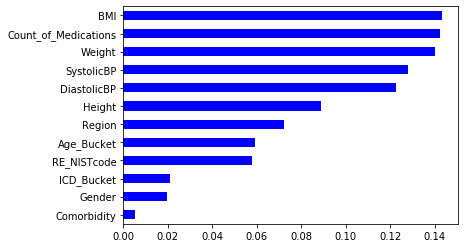

In [520]:
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_random_forest = pd.Series(model_for.feature_importances_,
index = x_cols)
# Sort importances_rf
sorted_importances_random_forest = importances_random_forest.sort_values()
# Make a horizontal bar plot
sorted_importances_random_forest.plot(kind='barh', color='blue')
plt.show()

In [521]:
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [522]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 1)

In [523]:
smt = SMOTE()
x_train, y_train = smt.fit_sample(x_train, y_train)
np.bincount(y_train)

array([4000, 4000], dtype=int64)

In [524]:
model_for = RandomForestClassifier()

#fit model
model_for.fit(x_train, y_train)

#create predictions based on model
y_pred_for = model_for.predict(x_test)

In [525]:
print(metrics.classification_report(y_test, y_pred_for))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87      1334
         1.0       0.42      0.39      0.40       316

    accuracy                           0.78      1650
   macro avg       0.64      0.63      0.63      1650
weighted avg       0.77      0.78      0.78      1650



In [526]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 1)

In [527]:
nr = NearMiss()
x_train, y_train = nr.fit_sample(x_train, y_train)
np.bincount(y_train)

array([950, 950], dtype=int64)

In [528]:
model_for = RandomForestClassifier()

#fit model
model_for.fit(x_train, y_train)

#create predictions based on model
y_pred_for = model_for.predict(x_test)

In [529]:
print(metrics.classification_report(y_test, y_pred_for))

              precision    recall  f1-score   support

         0.0       0.81      0.34      0.48      1334
         1.0       0.19      0.66      0.30       316

    accuracy                           0.40      1650
   macro avg       0.50      0.50      0.39      1650
weighted avg       0.69      0.40      0.44      1650



Going to one hot encode now and run other models. 

In [530]:
SP_SD_SM_SS_T.columns

Index(['PatientGuid', 'DMIndicator', 'ICD_Bucket', 'Count_of_Medications',
       'RE_NISTcode', 'Comorbidity', 'SystolicBP', 'BMI', 'DiastolicBP',
       'Weight', 'Height', 'Region', 'Age_Bucket', 'Gender'],
      dtype='object')

In [531]:
SP_SD_SM_SS_T = pd.concat([SP_SD_SM_SS_T,pd.get_dummies(SP_SD_SM_SS_T['Region'], prefix='Region',dummy_na=False)],axis=1).drop(['Region'],axis=1)

In [532]:
SP_SD_SM_SS_T = pd.concat([SP_SD_SM_SS_T,pd.get_dummies(SP_SD_SM_SS_T['RE_NISTcode'], prefix='RE_NISTcode',dummy_na=False)],axis=1).drop(['RE_NISTcode'],axis=1)

In [533]:
train = SP_SD_SM_SS_T[SP_SD_SM_SS_T['DMIndicator'].notnull()]
test = SP_SD_SM_SS_T[SP_SD_SM_SS_T['DMIndicator'].isnull()]

In [534]:
train.shape

(6600, 23)

In [535]:
test.shape

(3348, 23)

In [536]:
# Separate input features (X) and target variable (y)
y = train['DMIndicator']
x = train.drop(columns = ['DMIndicator','PatientGuid'], axis=1)
x_cols = x.columns

In [537]:
scaler = StandardScaler() #scaling our features due to various ranges
x = scaler.fit_transform(x)

In [538]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 1)

In [539]:
# Train model
#create the model
model = LogisticRegression()

#fit model
model.fit(x_train, y_train)

#create predictions based on model
y_pred = model.predict(x_test)

In [540]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90      1334
         1.0       0.71      0.09      0.17       316

    accuracy                           0.82      1650
   macro avg       0.77      0.54      0.53      1650
weighted avg       0.80      0.82      0.76      1650



Now, trying under and over sampling techniques due to the class imbalance. 

In [541]:
smt = SMOTE()
x_train, y_train = smt.fit_sample(x_train, y_train)
np.bincount(y_train)

array([4000, 4000], dtype=int64)

In [542]:
# Train model
#create the model
model = LogisticRegression()

#fit model
model.fit(x_train, y_train)

#create predictions based on model
y_pred = model.predict(x_test)

In [543]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.61      0.73      1334
         1.0       0.31      0.74      0.44       316

    accuracy                           0.64      1650
   macro avg       0.61      0.68      0.59      1650
weighted avg       0.80      0.64      0.68      1650



In [544]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 1)

In [545]:
nr = NearMiss()
x_train, y_train = nr.fit_sample(x_train, y_train)

In [546]:
# Train model
#create the model
model = LogisticRegression()

#fit model
model.fit(x_train, y_train)

#create predictions based on model
y_pred = model.predict(x_test)

In [547]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.45      0.58      1334
         1.0       0.21      0.60      0.31       316

    accuracy                           0.48      1650
   macro avg       0.52      0.53      0.45      1650
weighted avg       0.71      0.48      0.53      1650



Looking at brier score metrics for both of our models

In [548]:
# Compute the array containing the 10-folds CV MSEs
Brier_CV_scores = - cross_val_score(model, x_train, y_train, cv=10, 
                                  scoring='neg_brier_score', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
Mean_Brier_CV = Brier_CV_scores.mean()

# Print RMSE_CV
print('CV Brier: {:.2f}'.format(Mean_Brier_CV))

CV Brier: 0.19


In [549]:
Brier_CV_scores

array([0.13489891, 0.12620589, 0.15659857, 0.1755388 , 0.19201382,
       0.21781508, 0.22715938, 0.2273348 , 0.22853387, 0.23885468])

In [550]:
# Compute the array containing the 10-folds CV MSEs
Brier_CV_scores = - cross_val_score(model_for, x_train, y_train, cv=10, 
                                  scoring='neg_brier_score', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
Mean_Brier_CV = Brier_CV_scores.mean()

# Print RMSE_CV
print('CV Brier: {:.2f}'.format(Mean_Brier_CV))

CV Brier: 0.23


In [551]:
Brier_CV_scores

array([0.35385999, 0.25200149, 0.23828868, 0.19961044, 0.18325624,
       0.19652283, 0.22184286, 0.22253639, 0.21044617, 0.26266433])